<img heigth="8" src="https://i.imgur.com/BhG5KQ3.png" alt="pbs-enae">

<h1 align="left">Analisis de datos con Python</h1>

<h2 align="left"><i>Estrategias de marketing basadas en datos</i></h2>

<p align="left">
  <h3>Joseph F. Vergel-Becerra | Machine Learning - Tools and Skill Courses</h3>
  <br>
  <b>Last updated:</b> <i>15/03/2023</i>
  <br><br>
  <!-- <a href="#tabla-de-contenido">Tabla de contenido</a> • -->
  <a href="#referencias">Referencias</a> •
  <a href="#contribuir">Contribuir</a>
  <!-- <a href="#agradecimientos">Agradecimientos</a> -->
  <br><br>
</p>
<table align="left">
  <td>
      <a href="https://img.shields.io/badge/version-0.1.0-blue.svg?cacheSeconds=2592000">
        <img src="https://img.shields.io/badge/version-0.1.0-blue.svg?cacheSeconds=2592000" alt="Version" height="18">
      </a>
  </td>
  <td>
    <a href="https://colab.research.google.com/github/joefavergel/pbs-enae-python-beginners-course/blob/main/4-python-data-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
      </a>
  </td>
  <td>
    <a href="https://github.com/joefavergel/pbs-enae-ml-course" target="_parent"><img src="https://img.shields.io/github/forks/joefavergel/pbs-enae-ml-course?style=social" alt="Fork"/>
      </a>
  </td>
</table>
<br>
<br>

---

Ofrecer un servicio o producto a los clientes con un perfil de posible comprador, constituye un factor diferenciador en las estrategias comerciales y de marketing de las compañías e impacta drásticamente en el ahorro de recursos de estas divisiones. Es así como se define el concepto de *target* u objetivo en marketing, que no es más que la definición de los clientes potenciales o público general, que tiene como objetivo una determinada estrategia de marketing, a la hora de hacerles llegar los  productos o servicios de la compañía. En esta oportunidad **representaremos el brazo tecnológico de la división de marketing y comercialización de una institución bancaria** y plantearemos una solución predictiva sobre datos de campañas de marketing telefónico, con la que **predeciremos la probabilidad de que un cliente contrate un certificado de depósito a plazo fijo (CDP)**. De esta manera podremos ofrecerle a nuestros clientes con mayor probabilidad de suscripción, **campañas publicitarias acertadas que maximizen la captación de nuevos contratos** y que al mismo tiempo **reduzcan los costos publicitarios**.

<a id='tabla-de-contenido'></a>
## Tabla de contenido
    
<ol>
    <li><a href="#1-preludio"><b>Preludio</b></a></li>
    <li><a href="#2-ingesta"><b>Ingesta de datos</b></a></li>
    <li><a href="#3-analisis"><b>Análisis exploratorio de los datos</b></a></li>
    <ol type="i">
        <li><a href="#i-entendimiento">Entendimiento de los datos</a></li>
        <li><a href="#ii-descriptiva">Estadística descriptiva</a></li>
    </ol>
    <li><a href="#ejercicios"><b>Ejercicios caso practico: "Ingesta de Datos con Python"</b></a></li>
</ol>

<a id="1-preludio"></a>
## 1. Preludio

In [1]:
import sys
from IPython.core.display import HTML

from pathlib import Path
from packaging import version
import sklearn
import urllib.request


print("[INFO] Este proyecto requiere python 3.8 o superior y Scikit-Learn 1.0.1 o superior.")
assert sys.version_info >= (3, 8)
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")
print("[INFO] Versiones vificadas exitosamente!")


def css_styling():
    styles_path = Path(f"./styles/custom.css")
    if not styles_path.is_file():
        Path("styles").mkdir(parents=True, exist_ok=True)
        url = f"https://github.com/joefavergel/pbs-enae-ml-course/blob/main/styles/custom.css?raw=true"
        urllib.request.urlretrieve(url, styles_path)

    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)


css_styling()

[INFO] Este proyecto requiere python 3.8 o superior y Scikit-Learn 1.0.1 o superior.
[INFO] Versiones vificadas exitosamente!


<a id="2-ingesta"></a>
## 2. Ingesta de datos

La ingesta de datos a través de archivos es una práctica común en la gestión de información. Consiste en la importación de datos desde archivos, ya sean de texto, hojas de cálculo, bases de datos o cualquier otro formato, a un sistema o aplicación para su posterior procesamiento y análisis. Esta técnica es esencial para la mayoría de las empresas y organizaciones, ya que les permite recolectar y gestionar grandes cantidades de información de manera eficiente. En esta ocasión ingestaremos un base de datos de clientes del sector bancario.

In [2]:
from pathlib import Path
from zipfile import ZipFile
import urllib.request

DATASET = "banking-marketing-targets"
DATA_PATH = f"datasets/{DATASET}/"


def download_dataset(dataset: str):
    zipfile_path = Path(f"datasets/{dataset}.zip")
    if not zipfile_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = f"https://github.com/joefavergel/datasets/blob/main/{dataset}.zip?raw=true"
        urllib.request.urlretrieve(url, zipfile_path)
    Path(f"datasets/{dataset}").mkdir(parents=True, exist_ok=True)
    try:
        ZipFile(zipfile_path).extractall(f"datasets/{dataset}")
        print(f"[INFO] Dataset \'{dataset}\' downloaded and uncompressed correctly!")
    except Exception as e:
        print(f"[Exception] There's been a problem: {e}")


download_dataset(dataset=DATASET)

[INFO] Dataset 'banking-marketing-targets' downloaded and uncompressed correctly!


In [3]:
import os

print(
    f"[INFO] Los archivos presentes en \"{DATA_PATH}\":"
    f"\n\n{os.listdir(DATA_PATH)}"
)

[INFO] Los archivos presentes en "datasets/banking-marketing-targets/":

['test.csv', 'train.csv']


In [4]:
import os

import pandas as pd


train = pd.read_csv(os.path.join(DATA_PATH, "train.csv"), sep=";")
test = pd.read_csv(os.path.join(DATA_PATH, "test.csv"), sep=";")

train.rename(columns={"y": "cd"}, inplace=True)
test.rename(columns={"y": "cd"}, inplace=True)

with pd.option_context('display.max_columns', None):
    print(f"[INFO] Training dataset dimnesions (rows, cols): {train.shape}")
    display(train.head())
    
    print(f"\n[INFO] testing dataset dimnesions (rows, cols): {test.shape}")
    display(test.head())

[INFO] Training dataset dimnesions (rows, cols): (45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,cd
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no



[INFO] testing dataset dimnesions (rows, cols): (4521, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,cd
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


<a id="3-analisis"></a>
## 3. Análisis exploratorio de los datos

El analisis exploratorio de los datos (EDA por sus siglas en ingles) es como comunmente se denomina de forma tecnica a la fase de "Descubra y visualice los datos para obtener información".

<a id="i-entendimiento"></a>
### A. Entendimiento de los datos

### Información de las variables del *dataset*

Datos del cliente:

1. `edad` (numérico): edad del cliente.
2. `job` (categórico): tipo de trabajo.
3. `marital` (categórico): estado civil.
4. `educación` (categórico): Nivel de escolaridad (studios primarios, secundarios o terciarios).
5. `default` (*booleano*): ¿tiene algun credito en mora?
6. `balance` (numérico): saldo promedio anual, en euros.
7. `housing` (*booleano*): ¿tiene préstamo de vivienda?.
8. `loan` (*booleano*): ¿tiene préstamo personal?.

Las siguientes variables estan relacionadas con el último contacto de la campaña de marketing actual:

9. `contact` (categórico): tipo de comunicación con el cliente.
10. `day` (numérico): último día de contacto del mes.
11. `month` (categórico): último mes de contacto del año.
12. `duration` (numérico): duración del último contacto, en segundos.

Otros atributos de las instancias:

13. `campaign` (numérico): número de contactos realizados durante esta campaña y para este cliente, incluye último contacto.
14. `pdays` (numérico): número de días que transcurrieron desde la última vez que se contactó al cliente en una campaña anterior, donde -1 significa que el cliente no fue contactado previamente.
15. `previous` (numérico): número de contactos realizados antes de esta campaña y para este cliente 
16. `poutcome` (categórico): resultado de la campaña de marketing anterior.

Variable objetivo (*target*) a predecir:

17. `cd` (*booleano*): ¿El cliente ha suscrito un depósito a plazo?.

In [7]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  cd         45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


In [8]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  cd         4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
None


In [9]:
train.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
cd           0
dtype: int64

In [10]:
test.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
cd           0
dtype: int64

In [11]:
print("[INFO] Columns of trainig dataset: \n", train.columns)
print("\n[INFO] Columns of trainig dataset: \n", test.columns)
print(
    "\n[INFO] Difference between training columns set and testing columns set: \n",
    set(train.columns) - set(test.columns)
)

[INFO] Columns of trainig dataset: 
 Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cd'],
      dtype='object')

[INFO] Columns of trainig dataset: 
 Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cd'],
      dtype='object')

[INFO] Difference between training columns set and testing columns set: 
 set()


<a id="ii-descriptiva"></a>
### B. Estadistica descriptiva

La estadística descriptiva es importante en el análisis de datos porque ***proporciona una manera sistemática de resumir y visualizar grandes conjuntos de datos***. Permite identificar patrones, tendencias y características de los datos, como ***la media, la mediana y la desviación estándar***. Esto puede ayudar a entender mejor los datos y a tomar decisiones informadas basadas en la información que proporcionan. Además, ***la estadística descriptiva es una herramienta esencial para comunicar los hallazgos*** de una manera clara y efectiva a otras personas.

**Visualización de conteos de datos e histogramas de variables numéricas continuas**

La importancia de la visualización de variables categóricas y de variables numéricas continuas se puede resumir en los siguientes puntos:

- Ayuda a comprender y comunicar patrones y tendencias en los datos.
- Las variables categóricas representan características o atributos que se dividen en categorías o grupos discretos, mientras que las variables numéricas continuas representan valores que se pueden medir y se ubican en una escala continua.
- Al visualizar estas variables, se pueden identificar patrones, tendencias y relaciones en los datos.
- Esto permite tomar decisiones más informadas y precisas.
- Las visualizaciones pueden ayudar a comunicar los hallazgos a otras personas de manera clara y efectiva.

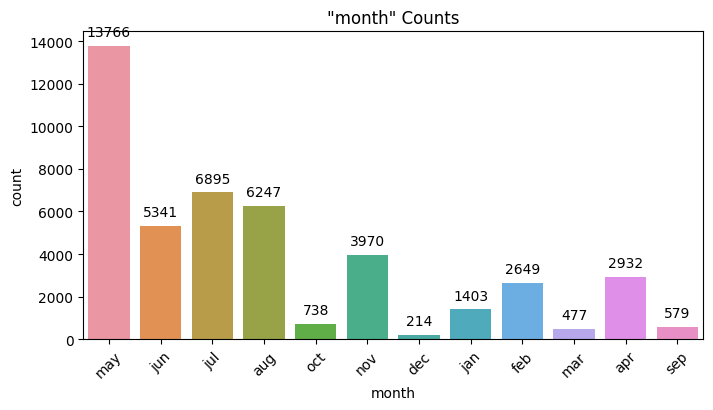

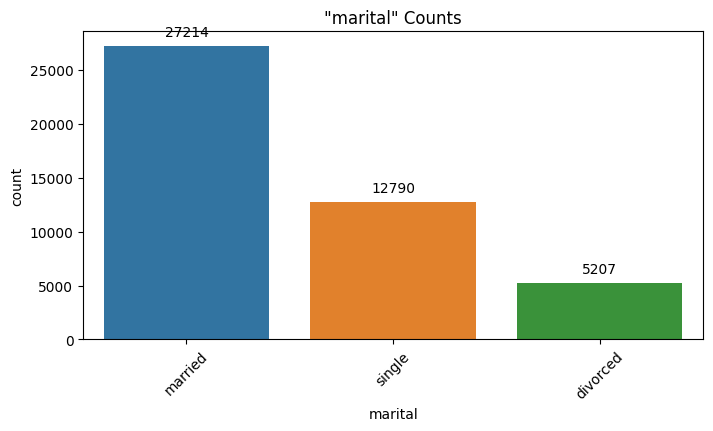

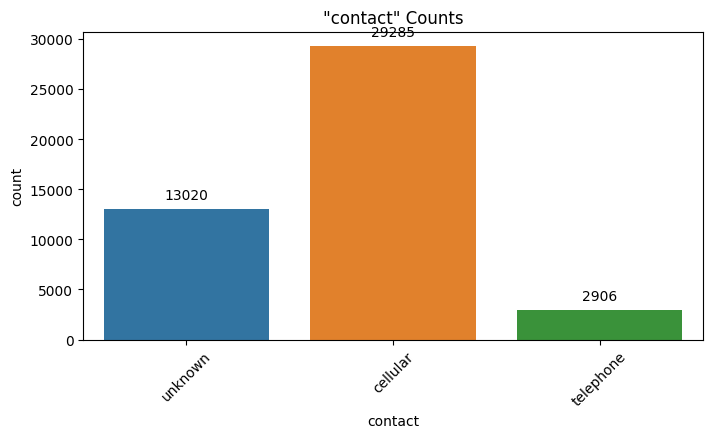

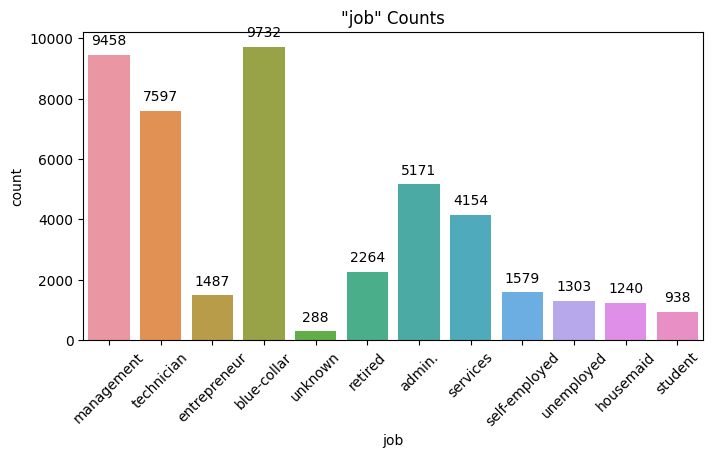

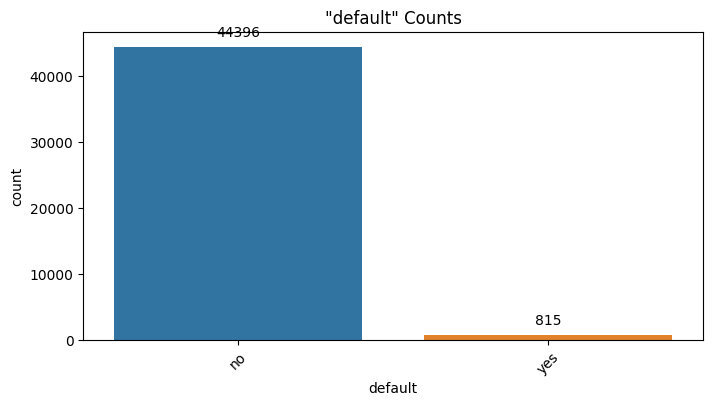

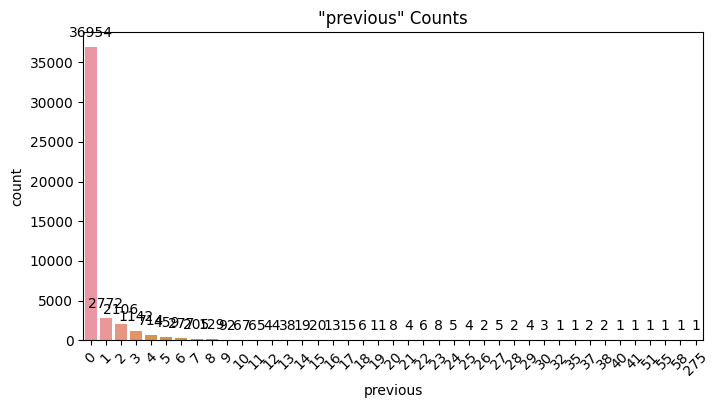

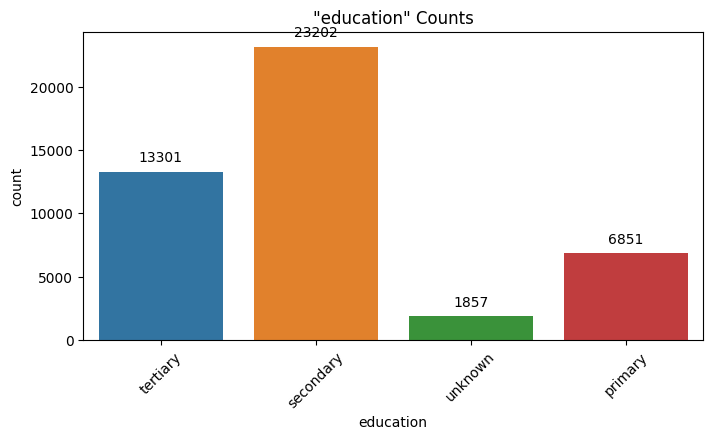

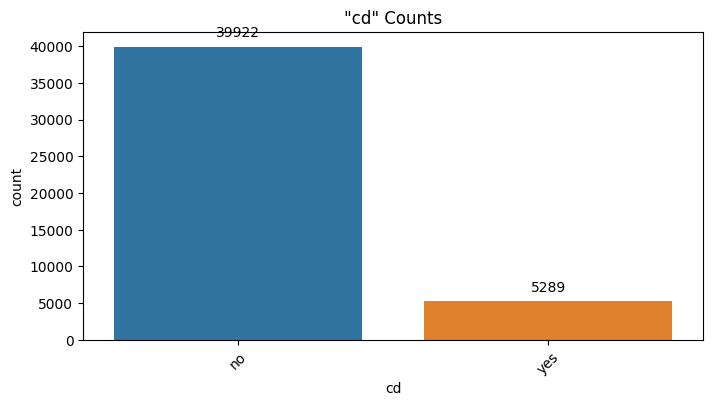

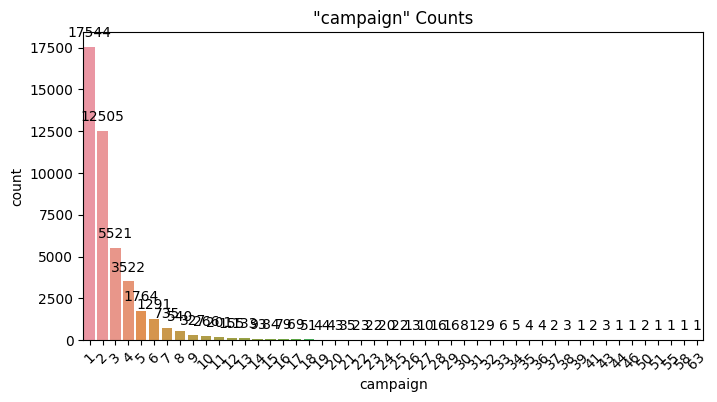

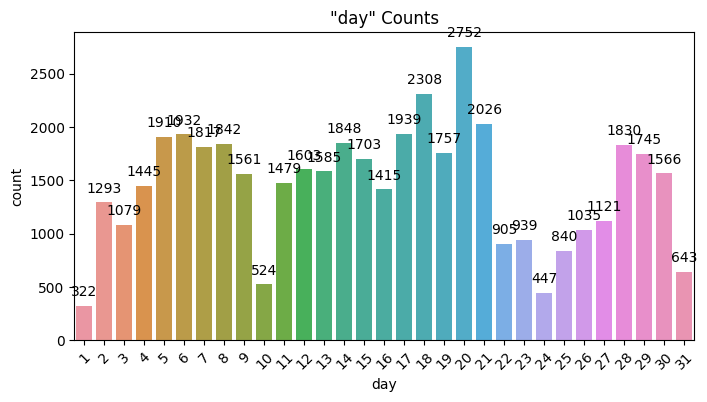

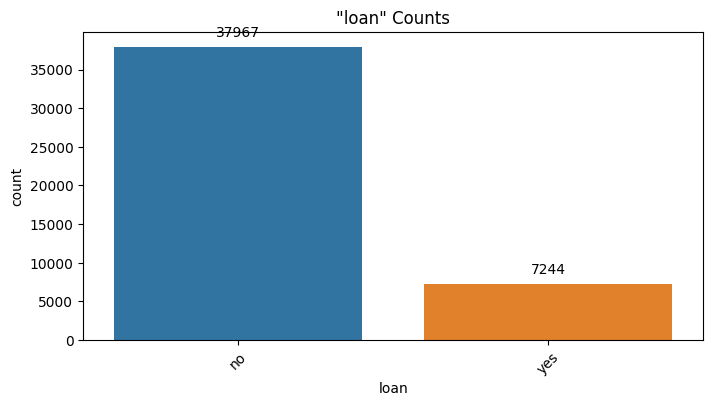

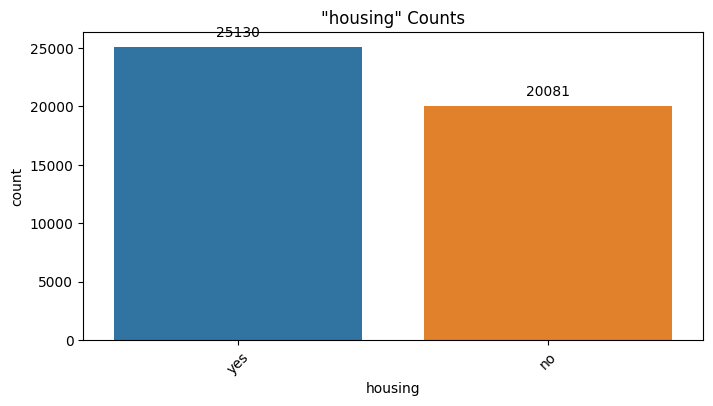

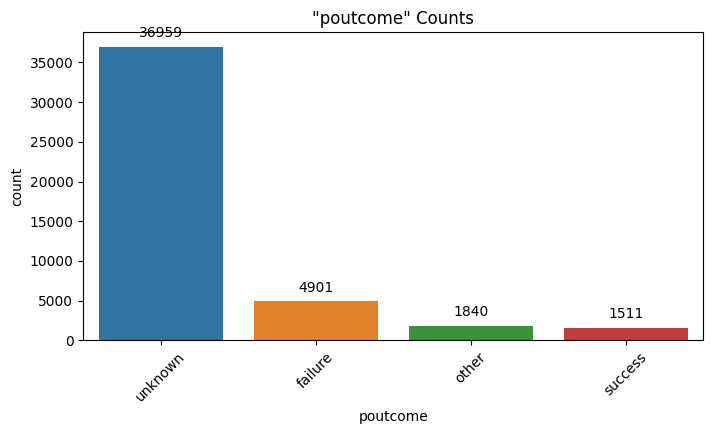

<Figure size 800x400 with 0 Axes>

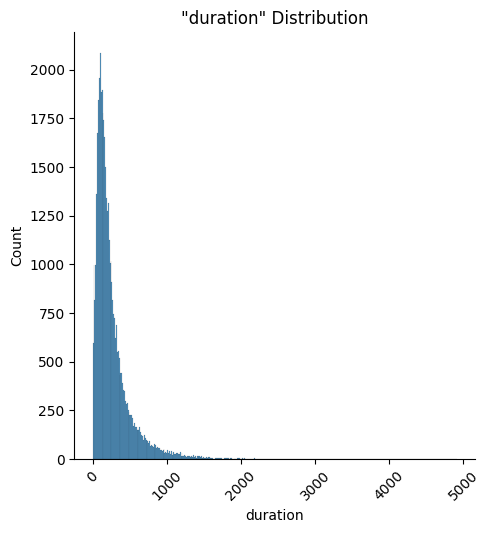

<Figure size 800x400 with 0 Axes>

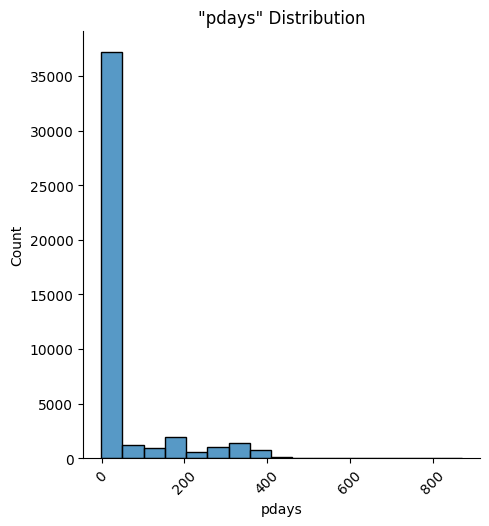

<Figure size 800x400 with 0 Axes>

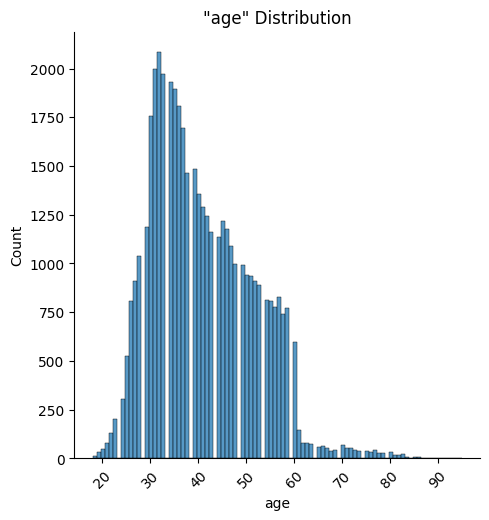

<Figure size 800x400 with 0 Axes>

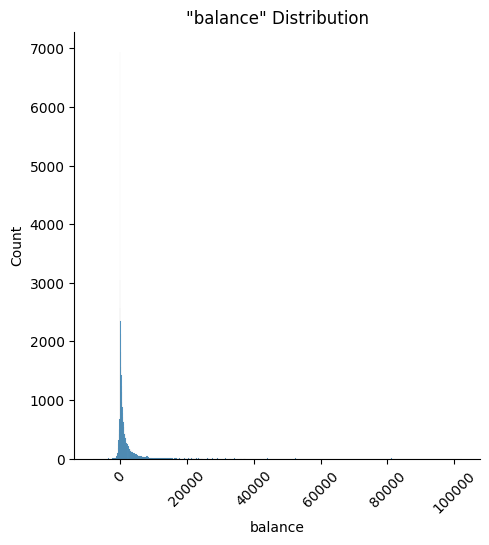

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

high_carinality = ["duration", "pdays", "age", "balance"]
categorical = train.select_dtypes(include=['object', 'int']).columns.values
categorical = list(set(categorical) - set(high_carinality))
features = categorical + high_carinality

for column in features:
    plt.figure(figsize=(8, 4))
    if column in categorical:
        count_plot = sns.countplot(x=train[column], data=train)
        for p in count_plot.patches:
            count_plot.annotate(
                format(p.get_height()),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center',
                va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points'
            )
        plt.title(f"\"{column}\" Counts")
        plt.xticks(rotation=45)
        plt.show()
    else:
        dist_plot = sns.displot(data=train, x=column)
        plt.title(f"\"{column}\" Distribution")
        plt.xticks(rotation=45)
        plt.show()


Como la mayoría de los datos presentes en el *dataset* corresponden a variables categóricas, es necesario transformar primero dichas variables a numéricas y posterior a esto, volver a efectuar EDA sobre los datos transformados.

**Medidas de tendencia central**

<p align="center">
  <a target="_blank">
    <img width="700px" src="https://i.imgur.com/KeJ6lbW.png" alt="standard-correlation">
  </a>
</p><br><br>

In [6]:
train.mean(numeric_only=True)

age           40.936210
balance     1362.272058
day           15.806419
duration     258.163080
campaign       2.763841
pdays         40.197828
previous       0.580323
dtype: float64

In [14]:
pd.DataFrame(train.median(numeric_only=True)).rename(columns={0: "median"})

,median
age,39.0
balance,448.0
day,16.0
duration,180.0
campaign,2.0
pdays,-1.0
previous,0.0


In [10]:
train.mode(numeric_only=True)

,age,balance,day,duration,campaign,pdays,previous
0,32,0,20,124,1,-1,0


**Medidas de dispersión**

<p align="center">
  <a target="_blank">
    <img width="700px" src="https://i.imgur.com/td7Vr3c.png" alt="standard-correlation">
  </a>
</p><br><br>

Una desviación estándar baja indica que la mayor parte de los datos de una muestra tienden a estar agrupados cerca de su media (también denominada el valor esperado), mientras que una desviación estándar alta indica que los datos se extienden sobre un rango de valores más amplio.

In [7]:
train.std(numeric_only=True)

age           10.618762
balance     3044.765829
day            8.322476
duration     257.527812
campaign       3.098021
pdays        100.128746
previous       2.303441
dtype: float64

La desviación estándar es la raíz cuadrada positiva de la varianza:

In [8]:
train.var(numeric_only=True)

age         1.127581e+02
balance     9.270599e+06
day         6.926361e+01
duration    6.632057e+04
campaign    9.597733e+00
pdays       1.002577e+04
previous    5.305841e+00
dtype: float64

Hay que tener en cuenta que la varianza puede verse muy influida por los valores atípicos y no se aconseja su uso cuando las distribuciones de las variables aleatorias tienen colas pesadas.

**Análisis de correlaciones**

El análisis de correlaciones es importante en el análisis de datos porque permite identificar ***si existe una relación estadística significativa entre dos o más variables***. La ***la correlación puede ser positiva, negativa o nula***, y puede variar en fuerza y dirección. Al identificar la correlación entre variables, es posible comprender mejor cómo se relacionan y cómo afectan mutuamente.

***Las correlaciones puede proporcionar información valiosa para la toma de decisiones y la planificación de estrategias***. Por ejemplo, puede ayudar a identificar variables que tienen un impacto significativo en el rendimiento de una empresa o a predecir cómo cambiará una variable si cambia otra.

Ahora, sabiendo la importancia de las correlaciones revisemos el coficiente de correlacion lineal de Pearson:

<p align="center">
  <a target="_blank">
    <img width="700px" src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1280px-Correlation_examples2.svg.png" alt="standard-correlation">
  </a><br><br>
  <b>Figura 1:</b> <i>Varios conjuntos de puntos (x, y), con el coeficiente de correlación de x e y para cada conjunto. La correlación refleja la fuerza y la dirección de una relación lineal (fila superior), pero no la pendiente de esa relación (centro), ni muchos aspectos de las relaciones no lineales (parte inferior). N.B.: la figura del centro tiene pendiente 0 pero en ese caso el coeficiente de correlación no está definido porque la varianza de Y es cero</i>¹⁶.
</p><br>

El coeficiente de correlación de Pearson va de –1 a 1. Cuando está cerca de 1, significa que hay una fuerte correlación positiva. Cuando el coeficiente es cercano a –1, significa que existe una fuerte correlación negativa o correlacion inversa. Finalmente, los coeficientes cercanos a 0 significan que no existe una correlación lineal. La Fig. 1 muestra varias distirbuciones de datos junto con el coeficiente de correlación entre sus ejes horizontal y vertical.

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns


def plot_corr(data: pd.DataFrame, title: str, method: str = "pearson", annot: bool = True):
    f,ax = plt.subplots(figsize=(10,8))
    sns.heatmap(
        data.corr(method=method),
        vmin=-1,
        vmax=1,
        annot=annot,
        linewidths=.5,
        fmt='.2f',
        ax=ax
    )
    plt.title(f"{method.title()}'s Correlation Coefficient between {title}")
    return ax

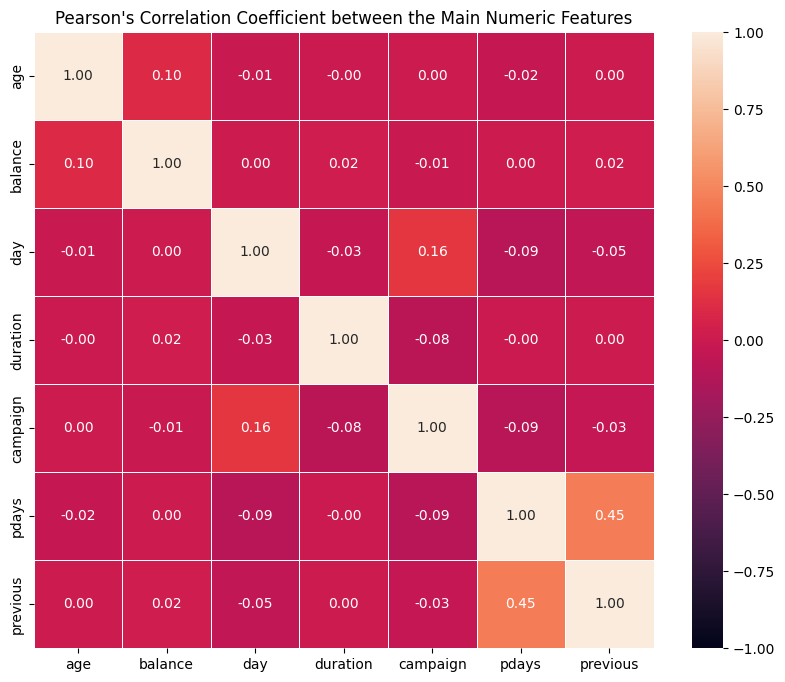

In [20]:
ax = plot_corr(
    train.select_dtypes("number"),
    title="the Main Numeric Features",
    method="pearson",
    annot=True
)
plt.show()

Observamos que las correlaciones mas fuertes existe entre las variables "pdays" y "previous" y las variables "day" y "campaign":

In [23]:
import numpy as np
import scipy


def plot_scatter_and_corr(
    dataframe: pd.DataFrame,
    x_feature: str,
    y_feature:str,
    ax: np.array = None,
    pos: int = None
) -> np.array:
    if ax is None:
        f, ax = plt.subplots(1, 2, figsize=(10,4))

    pos = 0 if pos is None else 1

    r, _ = scipy.stats.pearsonr(
        dataframe[x_feature].tolist(), dataframe[y_feature].tolist()
    )
    tau, _ = scipy.stats.kendalltau(
        dataframe[x_feature].tolist(), dataframe[y_feature].tolist()
    )
    ax[pos].scatter(
        dataframe[x_feature].tolist(),
        dataframe[y_feature].tolist(),
        alpha=0.2,
        color="#FC5185" if pos == 1 else "#364F6B",
        label=f"r={np.round(r, 2)}, tau={np.round(tau, 2)}"
    )
    ax[pos].set_xlabel(x_feature)
    ax[pos].set_ylabel(y_feature)
    ax[pos].set_title(f"{y_feature} vs. {x_feature}")
    ax[pos].tick_params(axis='x', rotation=45)
    ax[pos].legend()

    plt.tight_layout()

    return ax

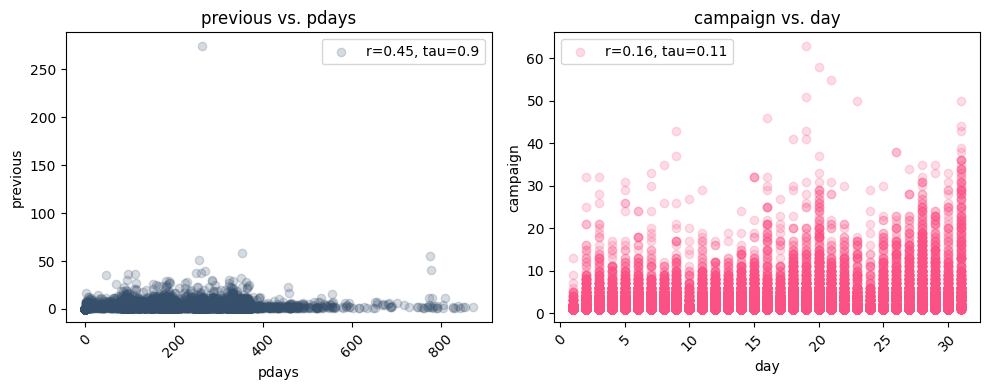

In [24]:
x_feature, y_feature = "pdays", "previous"
ax = plot_scatter_and_corr(
    dataframe=train, x_feature=x_feature, y_feature=y_feature,
)

x_feature, y_feature = "day", "campaign"
ax = plot_scatter_and_corr(
    dataframe=train, x_feature=x_feature, y_feature=y_feature, ax=ax, pos=1
)

plt.show()

In [26]:
def corr_upper_triangular_dot(*args, **kwargs):
    corr_tau = args[0].corr(args[1], method=method)
    corr_text = f"{corr_tau:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_tau) * 10000
    ax.scatter(
        [.5],
        [.5],
        marker_size,
        [corr_tau],
        alpha=0.6,
        cmap="coolwarm",
        vmin=-1,
        vmax=1,
        transform=ax.transAxes
    )
    font_size = abs(corr_tau) * 40 + 5
    ax.annotate(
        corr_text, [.5, .5,], 
        xycoords="axes fraction",
        ha='center',
        va='center',
        fontsize=font_size
    )
    return ax

/Users/joefaver/anaconda3/envs/pbs/lib/python3.9/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


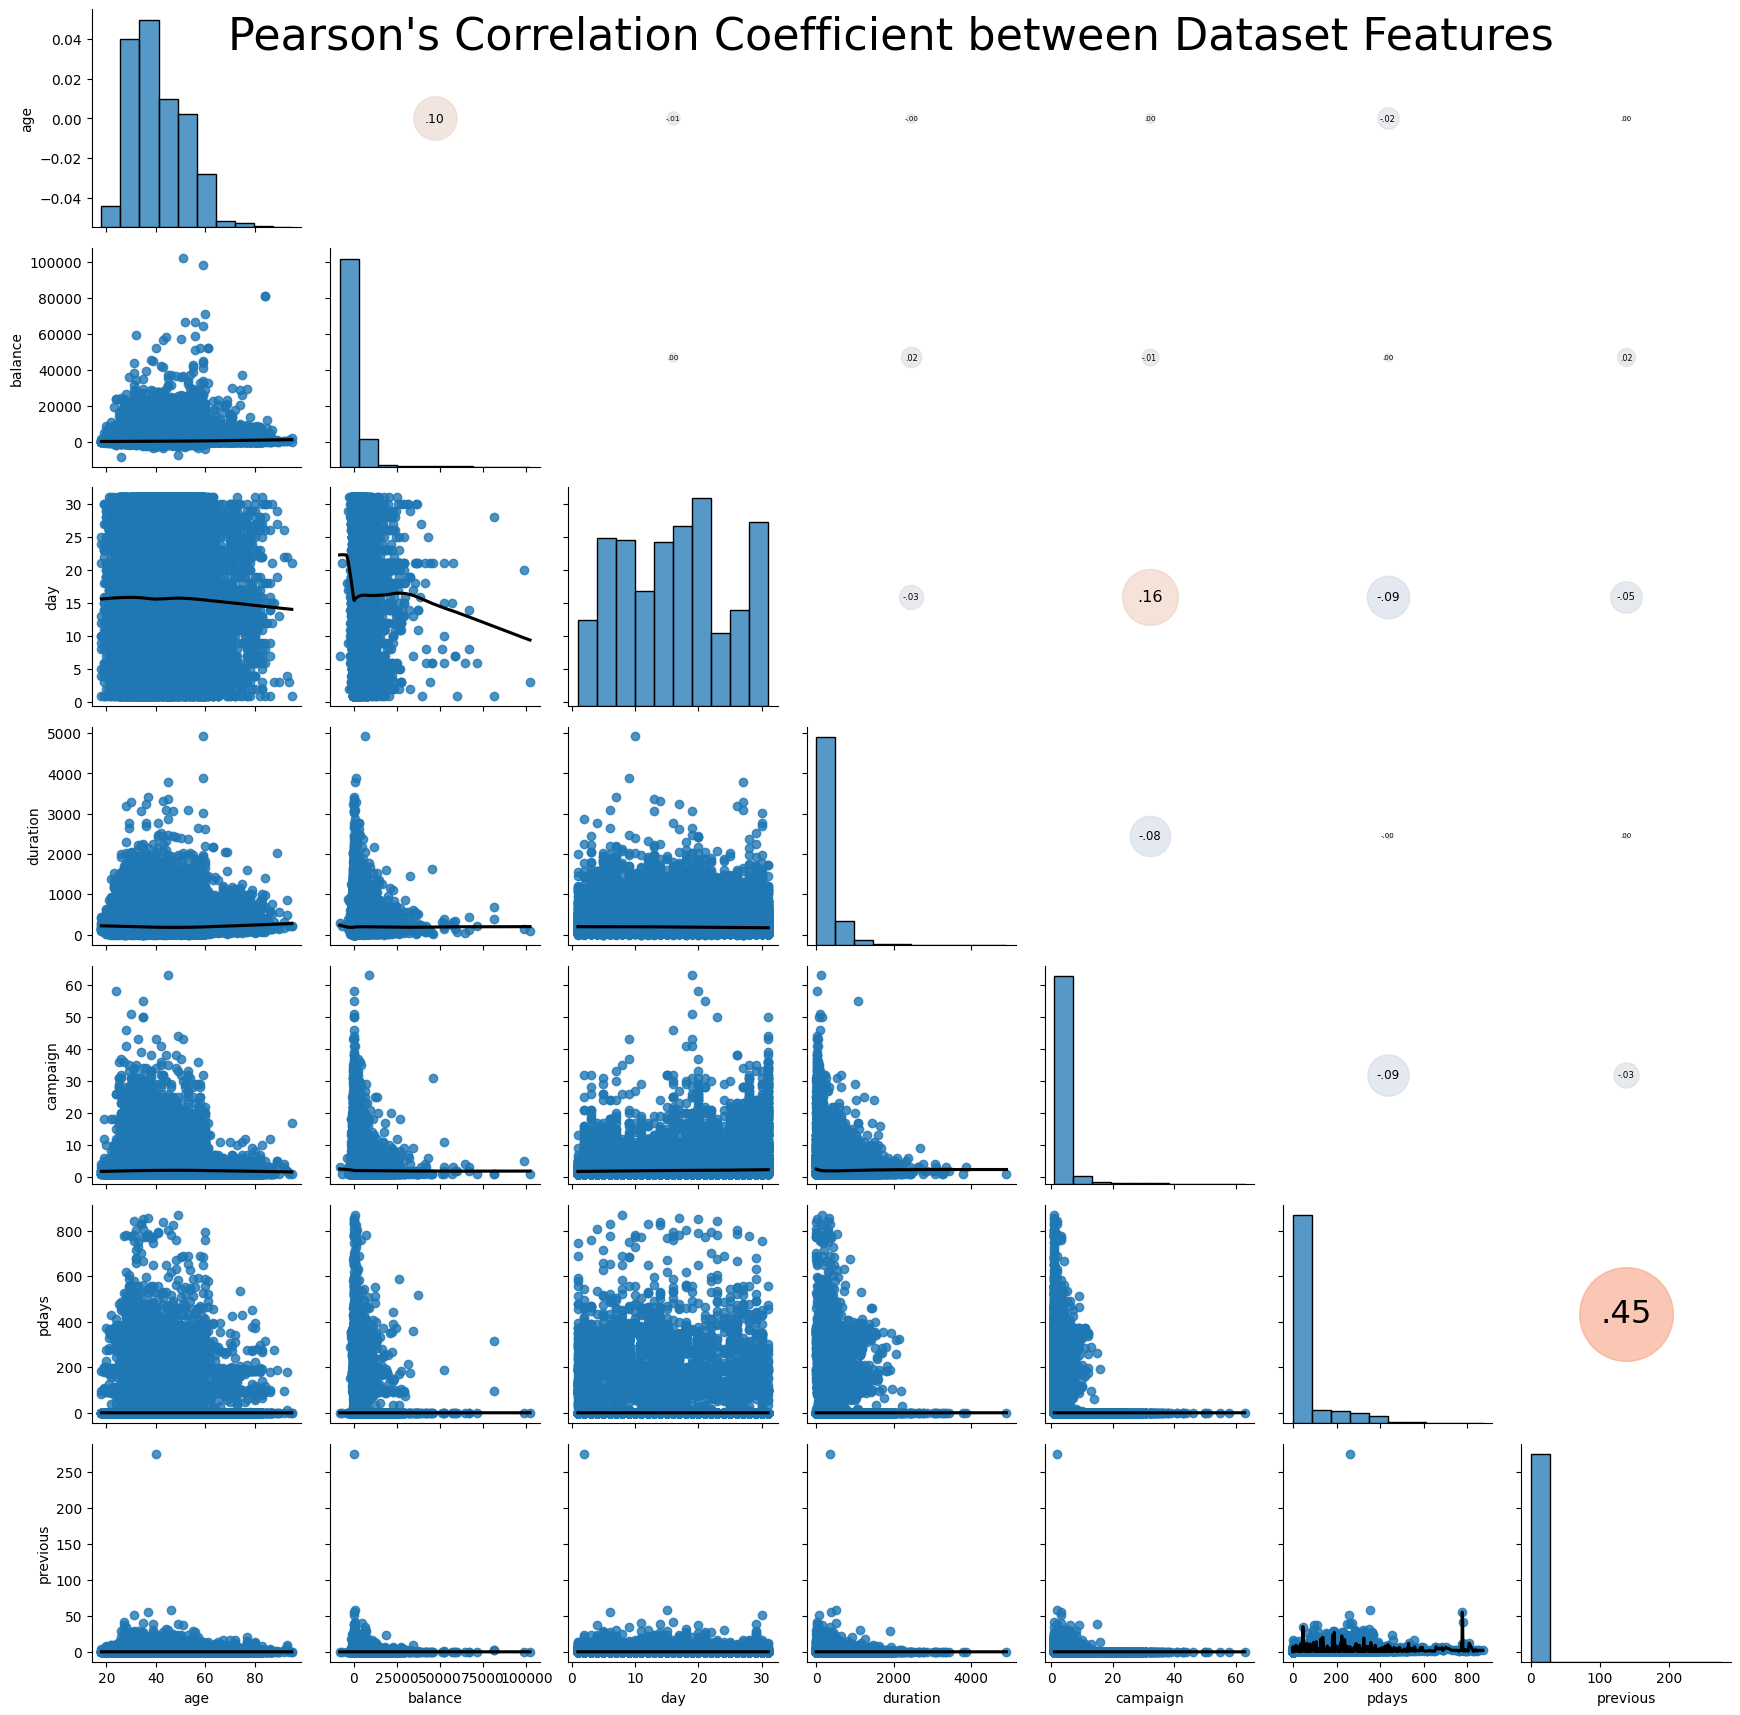

In [27]:
# np.seterr(invalid='ignore', over='ignore')

method = "pearson"
g = sns.PairGrid(train, aspect=1.0, diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=None, line_kws={'color': 'black'})
g.map_diag(sns.histplot, kde=False, bins=10)
g.map_upper(corr_upper_triangular_dot, method=method)
g.fig.suptitle(
    f"{method.title()}'s Correlation Coefficient between Dataset Features",
    fontsize=32
)
plt.show()

 **Analysis de valores faltantes**

 El análisis de valores faltantes es importante en el análisis de datos porque los valores faltantes pueden ***afectar la validez y la precisión de los resultados del análisis***. Los valores faltantes pueden ocurrir por diversas razones, como errores en la entrada de datos o la falta de respuesta a una pregunta en una encuesta. Al analizar los valores faltantes, es posible identificar patrones o sesgos en los datos y tomar medidas para corregirlos. En general, el análisis de valores faltantes es esencial para ***asegurar la integridad y confiabilidad de los resultados del análisis de datos***.

In [190]:
import numpy as np


train.replace("unknown", np.nan, inplace=True)
test.replace("unknown", np.nan, inplace=True)

In [191]:
from typing import NoReturn

import missingno as msno
from prettytable import PrettyTable


def quantify_missing(dataframe: pd.DataFrame, tol: float) -> NoReturn:
    missing_value = dataframe.isnull().mean() * 100
    missing_value_dict = missing_value.to_dict()
    missing_percentage = missing_value > tol
    missing_percentage = missing_percentage.to_dict()
    count = 0
    table = PrettyTable(
        ['Feature', 'Missing Value Percentage'], float_format='3.2'
    )
    features = []
    for key in missing_percentage:
        if missing_percentage[key]:
            table.add_row([key, np.round(missing_value_dict[key], 8)])
            count = count + 1
            features.append(key)
    print(table)
    print('Total quantified features:', count)

In [192]:
print(f"[INFO] Percentages of missing values for the training dataset (rows: {train.shape[0]}):")
quantify_missing(dataframe=train, tol=0.0)

print(f"\n[INFO] Percentages of missing values for the testing dataset (rows: {test.shape[0]}):")
quantify_missing(dataframe=test, tol=0.0)

[INFO] Percentages of missing values for the training dataset (rows: 45211):
+-----------+--------------------------+
|  Feature  | Missing Value Percentage |
+-----------+--------------------------+
|    job    |           0.64           |
| education |           4.11           |
|  contact  |          28.80           |
|  poutcome |          81.75           |
+-----------+--------------------------+
Total quantified features: 4

[INFO] Percentages of missing values for the testing dataset (rows: 4521):
+-----------+--------------------------+
|  Feature  | Missing Value Percentage |
+-----------+--------------------------+
|    job    |           0.84           |
| education |           4.14           |
|  contact  |          29.29           |
|  poutcome |          81.95           |
+-----------+--------------------------+
Total quantified features: 4


[INFO] Analysis of missing values for the training dataset (rows: 45211):


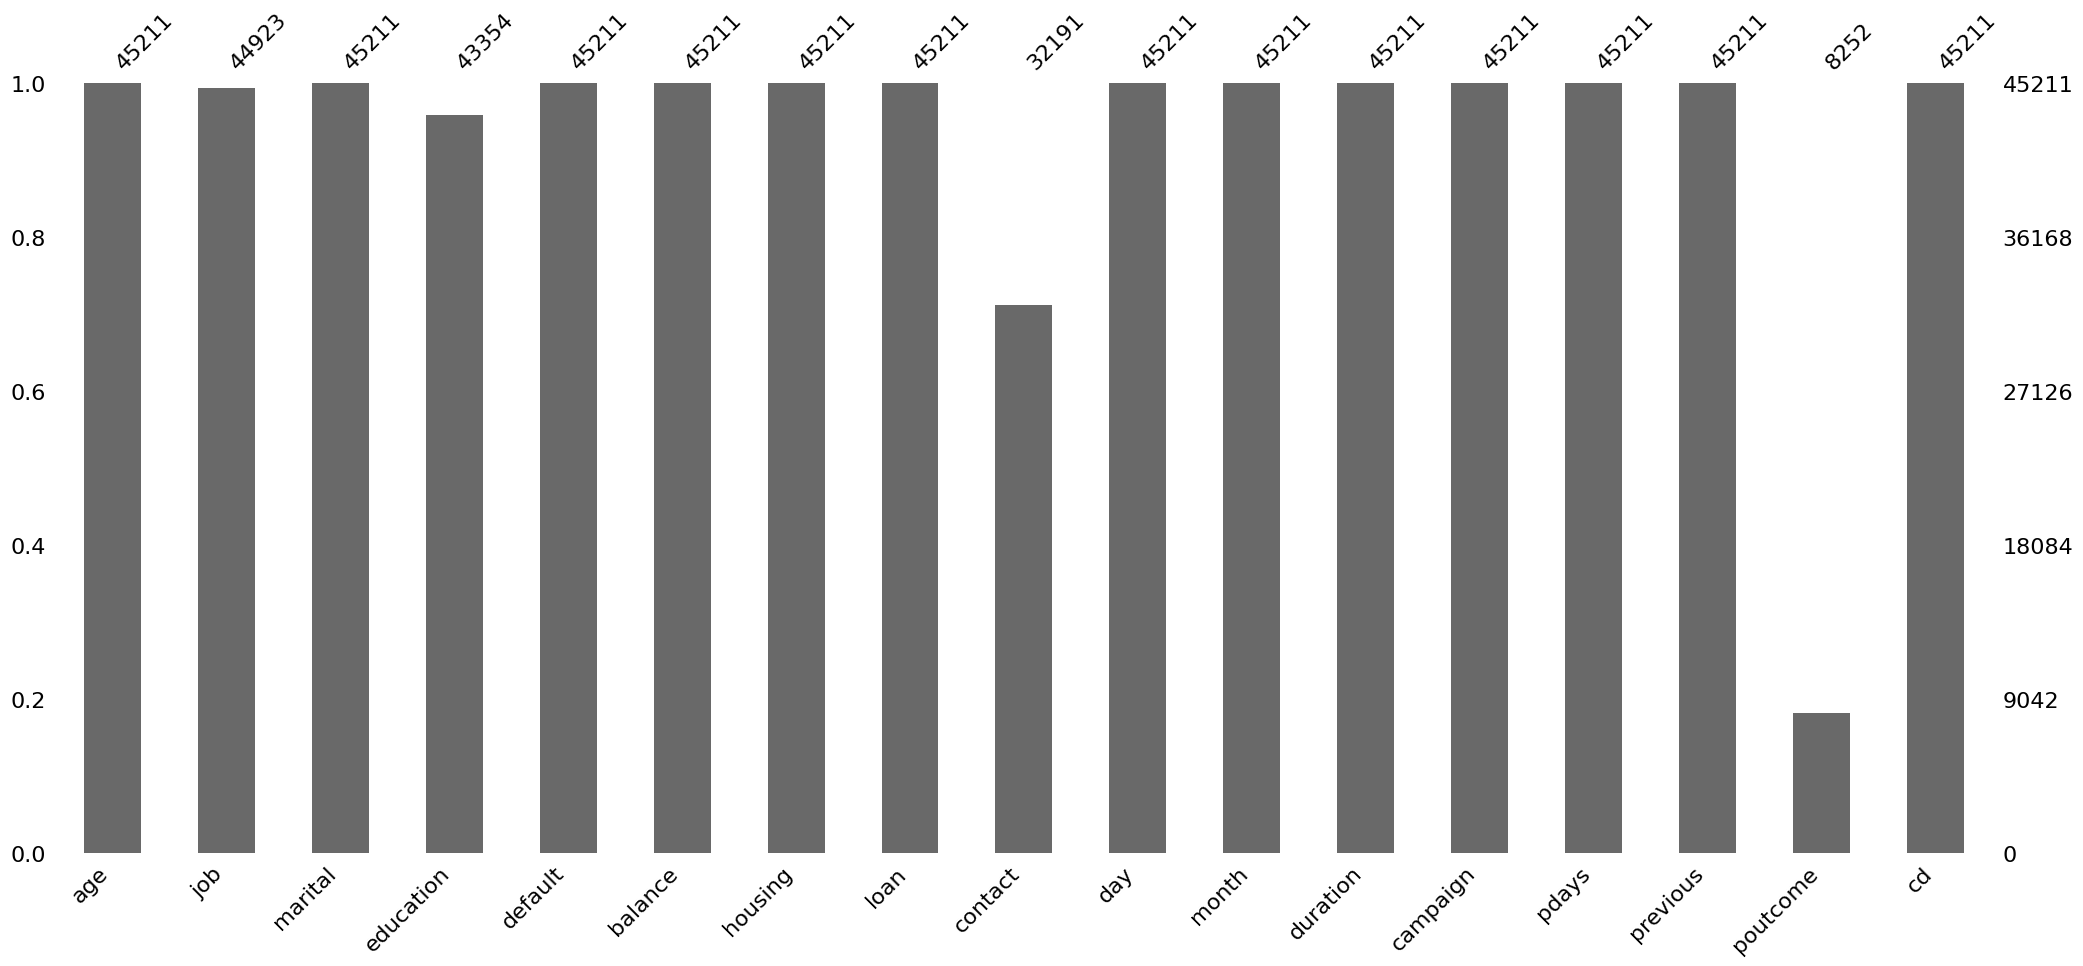

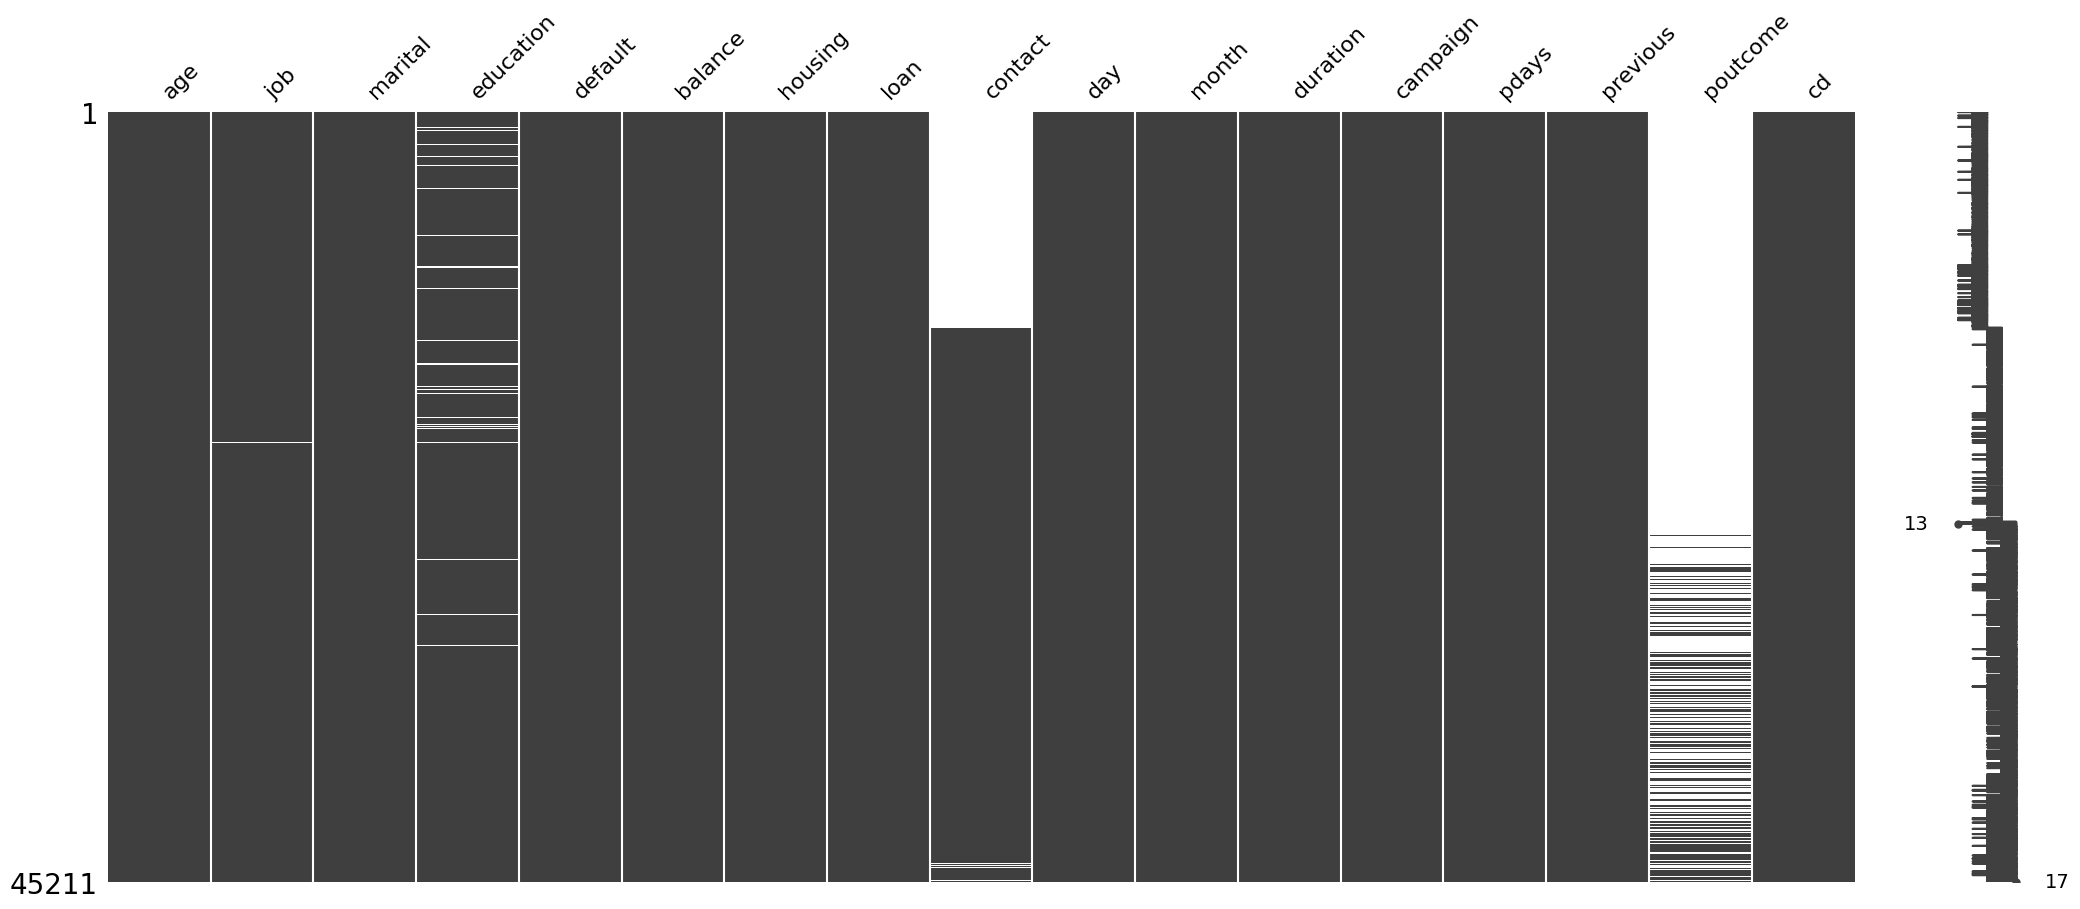

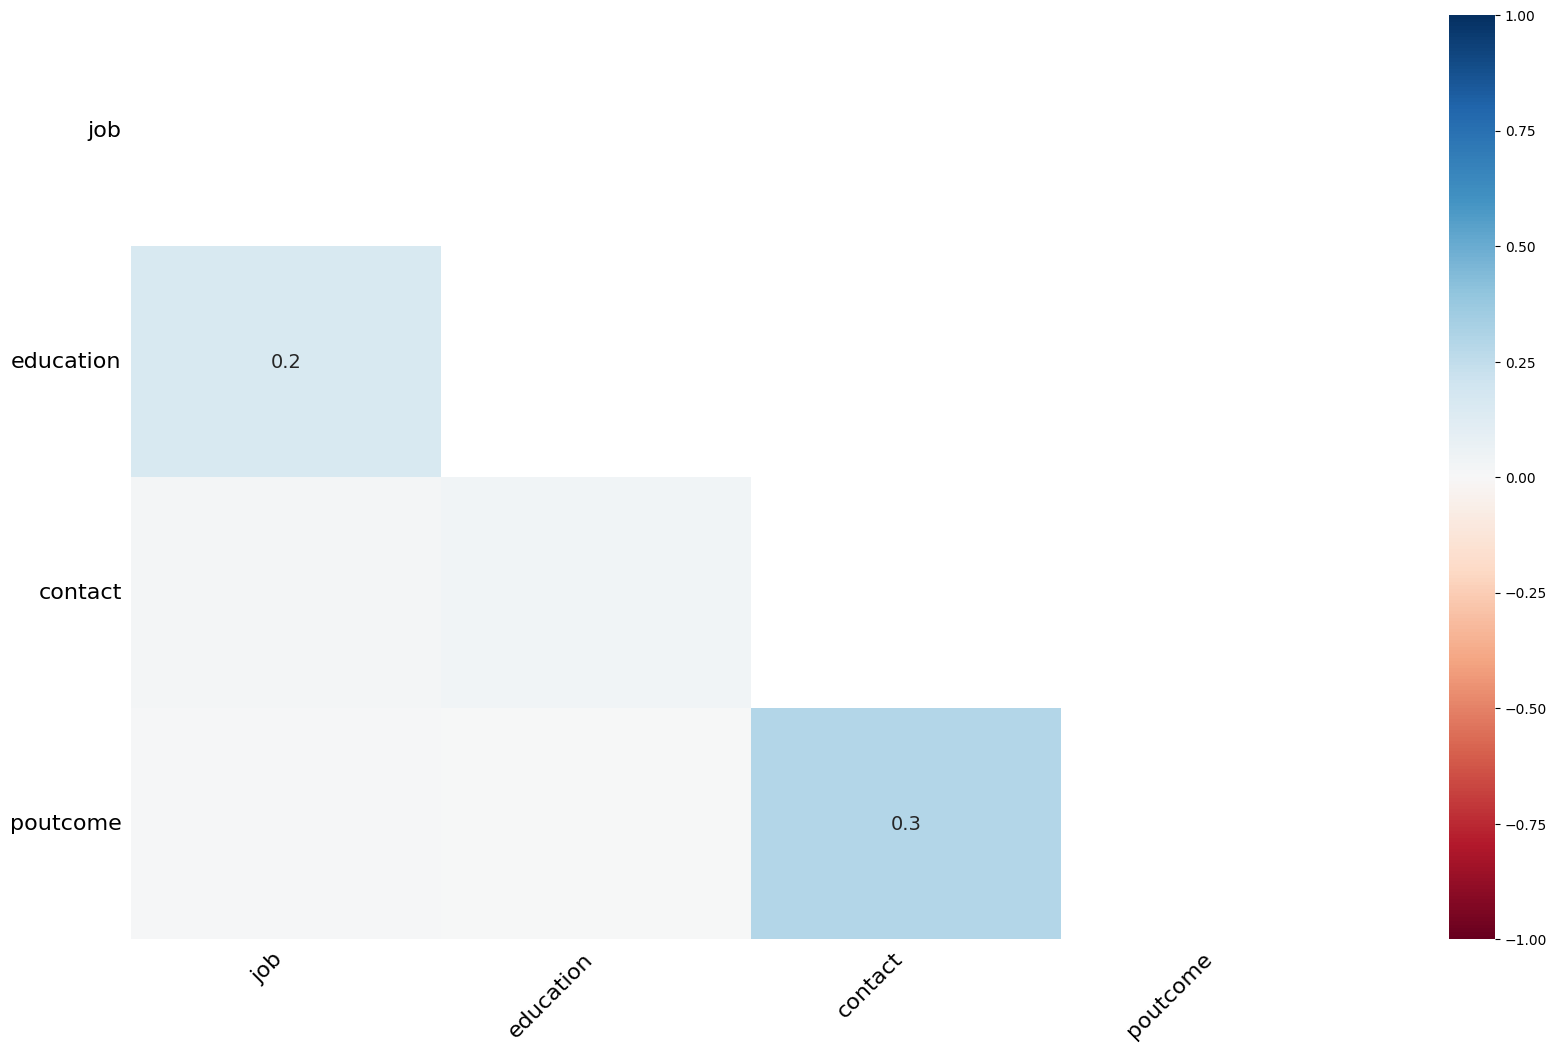

In [193]:
print(f"[INFO] Analysis of missing values for the training dataset (rows: {train.shape[0]}):")
msno.bar(train)
plt.show()

msno.matrix(train)
plt.show()

msno.heatmap(train)
plt.show()

In [194]:
train["contact"].value_counts(normalize=True, dropna=False)

cellular     0.647741
NaN          0.287983
telephone    0.064276
Name: contact, dtype: float64

In [195]:
train["poutcome"].value_counts(normalize=True, dropna=False)

NaN        0.817478
failure    0.108403
other      0.040698
success    0.033421
Name: poutcome, dtype: float64

Despues de analizar los valore faltantes, se define que:

- `job` y `education` seran imputadas mediante imputacion simple y la estrategia del valor mas frecuente.
- `contact` y `poutcome` seran descartadas del *dataset*.

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,cd
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,no
3,47,blue-collar,married,secondary,no,1506,yes,no,5,may,92,1,-1,0,no
4,33,blue-collar,single,secondary,no,1,no,no,5,may,198,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,17,nov,977,3,-1,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,17,nov,456,2,-1,0,yes
45208,72,retired,married,secondary,no,5715,no,no,17,nov,1127,5,184,3,yes
45209,57,blue-collar,married,secondary,no,668,no,no,17,nov,508,4,-1,0,no


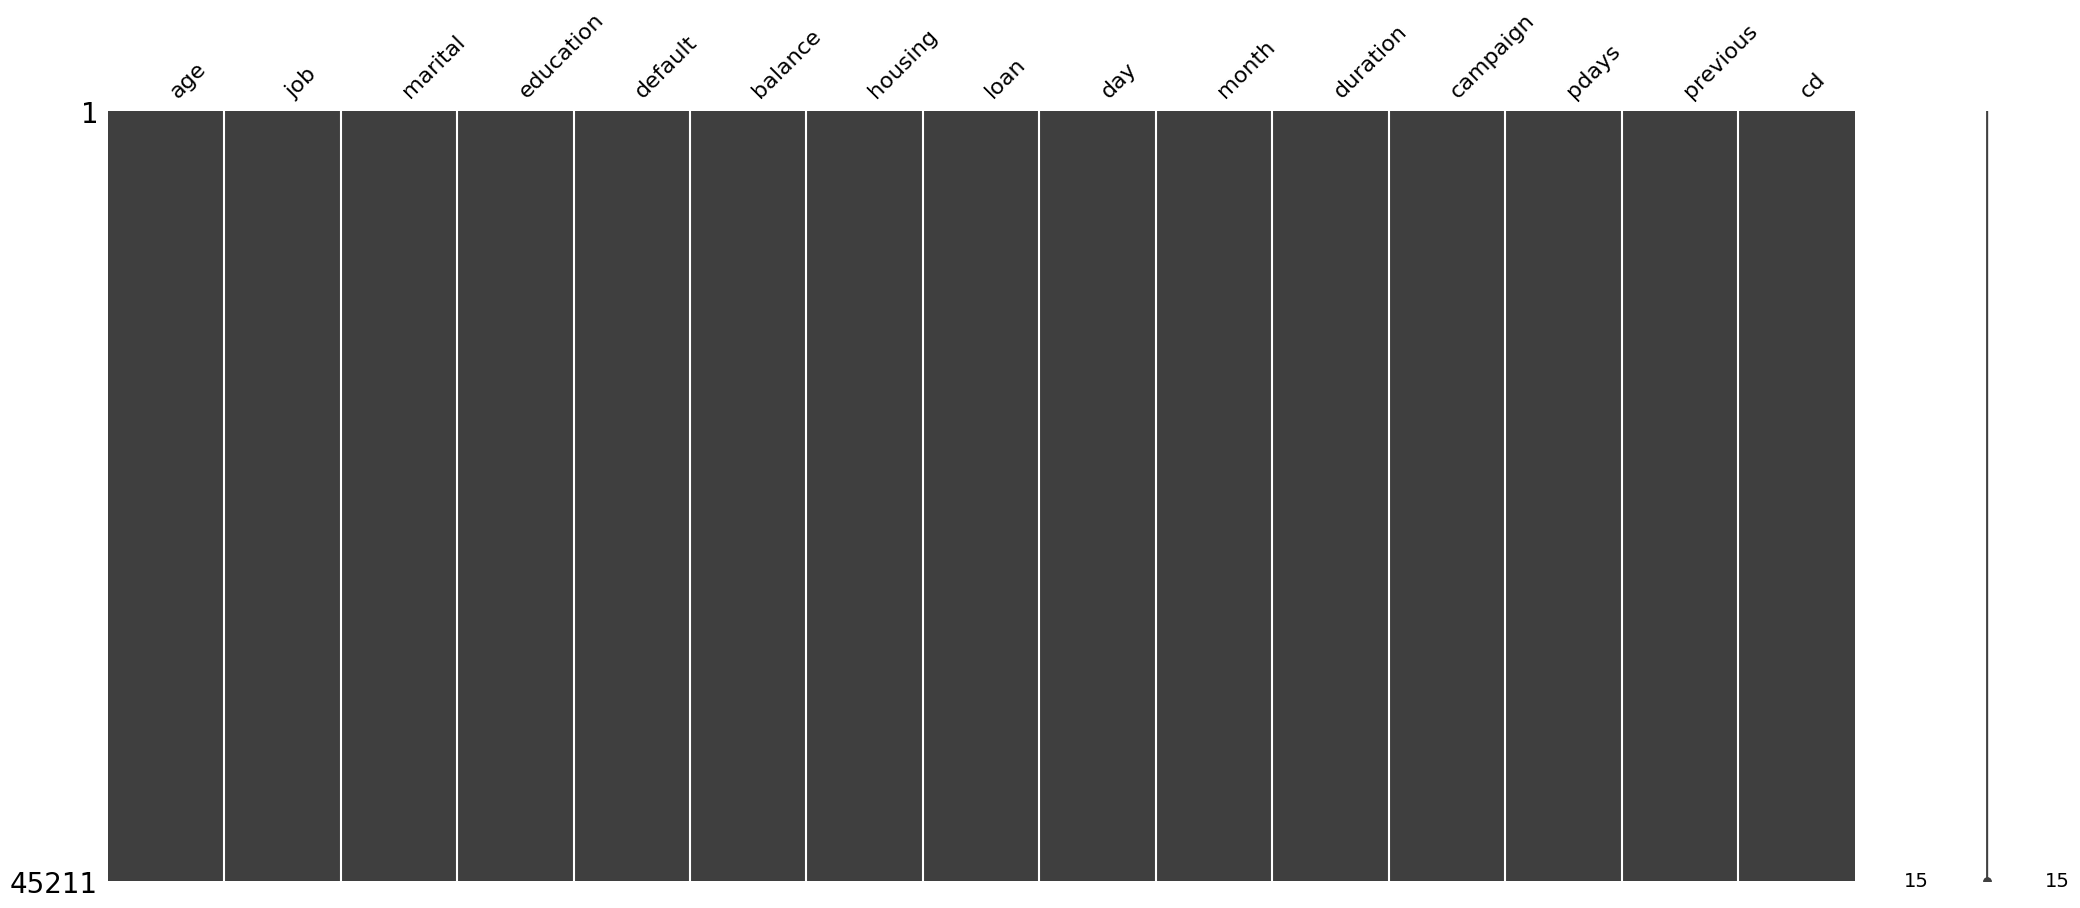

In [196]:
from sklearn.impute import SimpleImputer


imp_mode = SimpleImputer(
    missing_values=np.nan,
    strategy='most_frequent'
)
imp_mode.fit(train[["job", "education"]])
train[["job", "education"]] = imp_mode.transform(train[["job", "education"]])

train.drop(["contact", "poutcome"], axis=1, inplace=True)

with pd.option_context('display.max_columns', None):
    display(train)

msno.matrix(train)
plt.show()

Para evitar la fuga de datos o *data leakage*, utilizamos el mismo imputador ajustado en los datos del conjunto de entrenamiento, sobre el conjunto de *test*.

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,cd
0,30,unemployed,married,primary,no,1787,no,no,19,oct,79,1,-1,0,no
1,33,services,married,secondary,no,4789,yes,yes,11,may,220,1,339,4,no
2,35,management,single,tertiary,no,1350,yes,no,16,apr,185,1,330,1,no
3,30,management,married,tertiary,no,1476,yes,yes,3,jun,199,4,-1,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,5,may,226,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,30,jul,329,5,-1,0,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,9,may,153,1,-1,0,no
4518,57,technician,married,secondary,no,295,no,no,19,aug,151,11,-1,0,no
4519,28,blue-collar,married,secondary,no,1137,no,no,6,feb,129,4,211,3,no


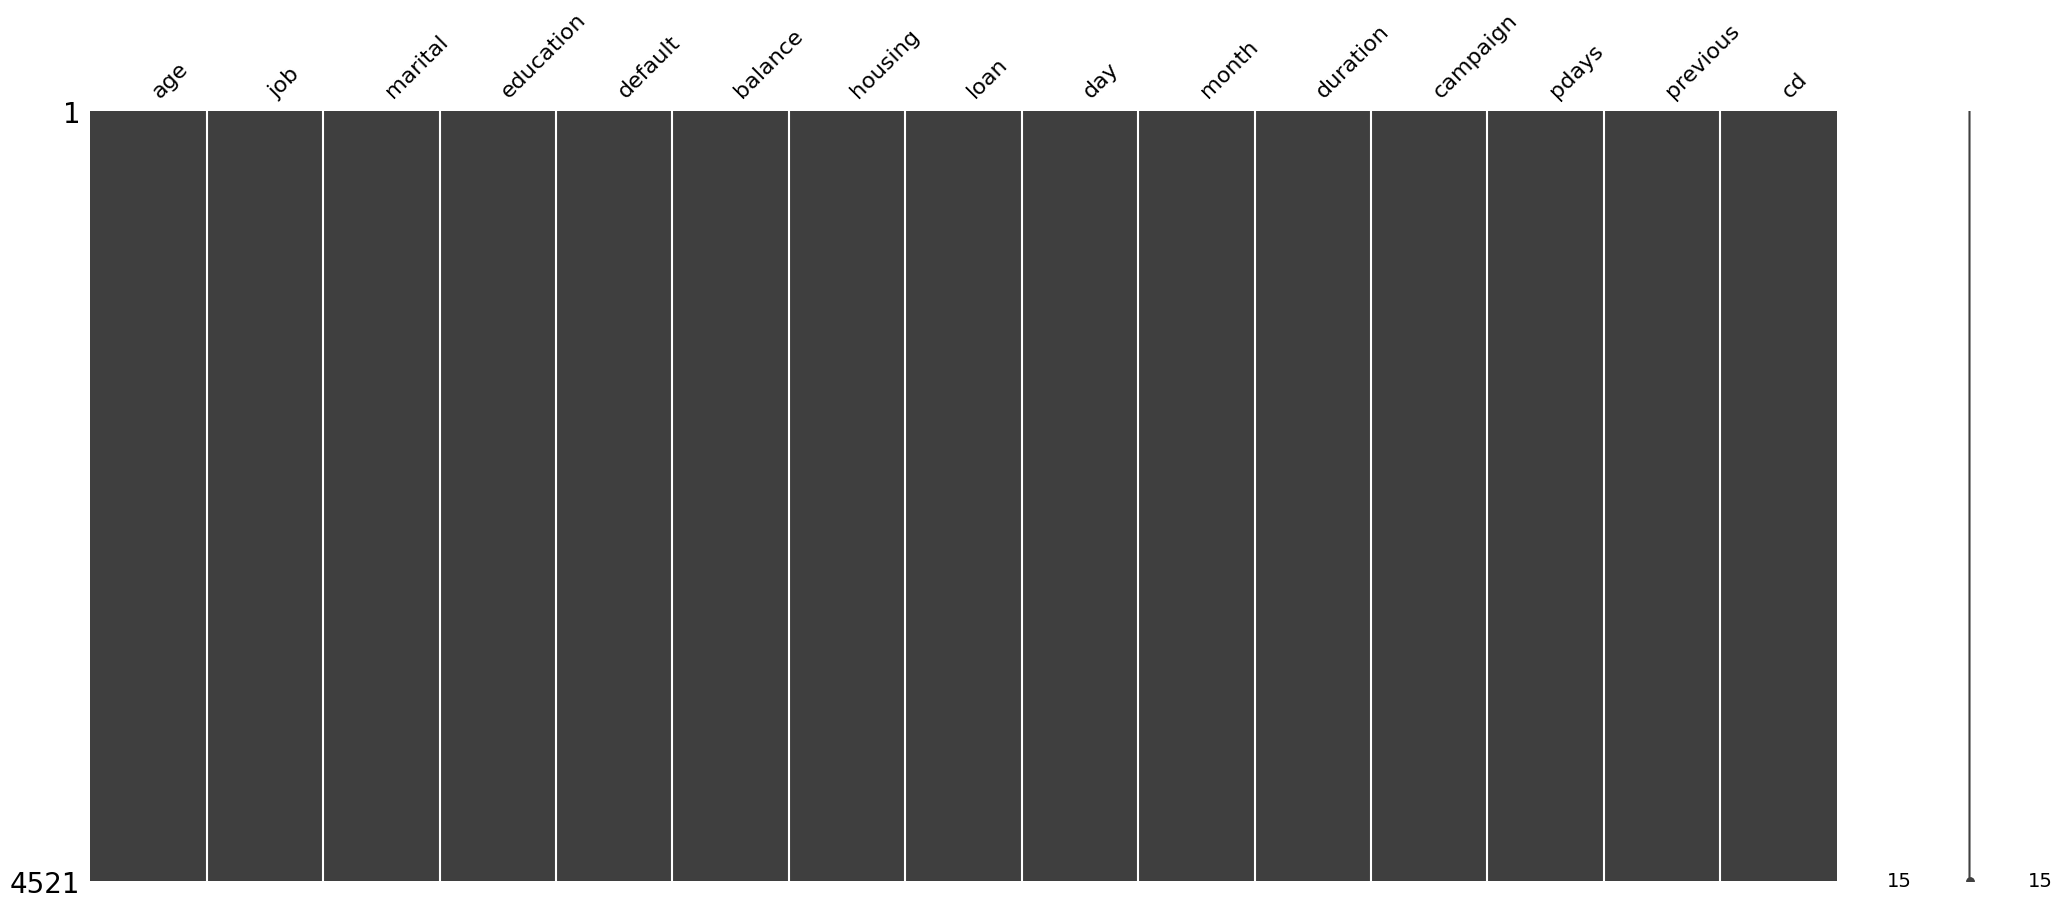

In [197]:
test[["job", "education"]] = imp_mode.transform(test[["job", "education"]])
test.drop(["contact", "poutcome"], axis=1, inplace=True)

with pd.option_context('display.max_columns', None):
    display(test)

msno.matrix(test)
plt.show()

## Remoción de *outliers*

In [170]:
def get_numeric_feature_info(feature: str, dataframe: pd.DataFrame) -> NoReturn:
    skewness = dataframe[feature].skew()
    kurtosis = dataframe[feature].kurt()

    print(f"[INFO] Minimum value of \"{feature}\": %f" % dataframe[feature].min())
    print(f"[INFO] Maximum value of \"{feature}\": %f" % dataframe[feature].max())
    print(f"[INFO] Skewness of \"{feature}\": %f" % skewness)
    print(f"[INFO] Kurtosis of \"{feature}\": %f" % kurtosis)
    print(
        f"[INFO] The \"{feature}\" feature is normaly distributed!\n"
        if (-2 <= skewness <= 2) and (-7 <= kurtosis <= 7)
        else f"[INFO] The \"{feature}\" feature does not correspond to a normal distribution!\n"
    )


for feature in high_carinality:
    get_numeric_feature_info(feature=feature, dataframe=train)

[INFO] Minimum value of "duration": 0.000000
[INFO] Maximum value of "duration": 4918.000000
[INFO] Skewness of "duration": 3.144318
[INFO] Kurtosis of "duration": 18.153915
[INFO] The "duration" feature does not correspond to a normal distribution!

[INFO] Minimum value of "pdays": -1.000000
[INFO] Maximum value of "pdays": 871.000000
[INFO] Skewness of "pdays": 2.615715
[INFO] Kurtosis of "pdays": 6.935195
[INFO] The "pdays" feature does not correspond to a normal distribution!

[INFO] Minimum value of "age": 18.000000
[INFO] Maximum value of "age": 95.000000
[INFO] Skewness of "age": 0.684818
[INFO] Kurtosis of "age": 0.319570
[INFO] The "age" feature is normaly distributed!

[INFO] Minimum value of "balance": -8019.000000
[INFO] Maximum value of "balance": 102127.000000
[INFO] Skewness of "balance": 8.360308
[INFO] Kurtosis of "balance": 140.751547
[INFO] The "balance" feature does not correspond to a normal distribution!



Se concluye entonces que no se debe aplicar una remoción de *outliers*.

## Ingeniería de características

En cuanto al proceso de ingeniería de características, el gerente comercial y de marketing nos comenta que recientemente ha leído el artículo "[How Age Impacts Consumer Behavior in Retail Banking](https://thefinancialbrand.com/news/financial-education/age-consumer-behavior-patterns-banking-61246/)". El gerente nos explica que en términos generales, el artículo propone un análisis segmentado de cuales son los productos y servicios que más les interesa a los clientes del sector bancario, en términos de  rangos de edad. El gerente manifiesta su interés en llevar este conocimiento al algoritmo de *machine learning*.

<p align="center">
  <a target="_blank">
    <img width="500px" src="https://thefinancialbrand.com/wp-content/uploads/2016/09/financial_education_topics.png" alt="standard-correlation">
  </a>
</p><br><br>

In [13]:
age_ranges = {
    1: (18, 25),
    2: (25, 35),
    3: (35, 45),
    4: (45, 55),
    5: (55, 65),
    6: (65,75),
    7: (75, 85),
    8: (85, 200)
}


def transform_age_to_categorical(ages, age_ranges):
    cat_age = [[
        ranges_index for ranges_index, range in age_ranges.items()
        if range[0] <= age < range[1]
    ] for age in ages]

    return [item for sublist in cat_age for item in sublist]


train["cat_age"] = transform_age_to_categorical(train["age"].tolist(), age_ranges)
test["cat_age"] = transform_age_to_categorical(test["age"].tolist(), age_ranges)

with pd.option_context('display.max_columns', None):
    display(train)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,cd,cat_age
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,5
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,3
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,2
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,4
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,6
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,6
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,5


## Transformación de características

In [199]:
for feature in ["default", "housing", "loan", "cd"]:
    train[feature] = train[feature].replace(["yes", "no"], [1, 0]).astype(int)
    test[feature] = test[feature].replace(["yes", "no"], [1, 0]).astype(int)

train["pdays"] = train["pdays"].replace(-1, 0)
test["pdays"] = test["pdays"].replace(-1, 0)

Necesitamos transformar las características categóricas. Las dos formas basicas para hacerlo son *labeling encoding* y el *one-hot encoding* (variante del *dummy encoding*).

- `job`: Usaremos *labeling encoding* porque hay muchas categorías.
- `education`: Usaremos la codificación de etiquetas porque es una característica categórica ordinal.
- `marital`: Usaremos *one-hot encoding*.
- `month`: Usaremos *one-hot encoding*.
<!-- - `poutcome` : Usaremos *one-hot encoding*. -->

In [200]:
from sklearn.preprocessing import LabelEncoder


laenc = LabelEncoder()
# train['job'] = laenc.fit_transform(train['job'])
train['education'] = laenc.fit_transform(train['education'])
test['education'] = laenc.fit_transform(test['education'])
train = pd.concat([
    train,
    pd.get_dummies(train["job"], prefix='job'),
    pd.get_dummies(train["marital"], prefix='marital'),
    pd.get_dummies(train["month"], prefix='month')
], axis=1)

test = pd.concat([
    test,
    pd.get_dummies(test["job"], prefix='job'),
    pd.get_dummies(test["marital"], prefix='marital'),
    pd.get_dummies(test["month"], prefix='month')
], axis=1)

with pd.option_context('display.max_columns', None):
    print(f"[INFO] Training dataset dimnesions (rows, cols): {train.shape}")
    display(train.head())

[INFO] Training dataset dimnesions (rows, cols): (45211, 42)


,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,cd,cat_age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,management,married,2,0,2143,1,0,5,may,261,1,0,0,0,5,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,44,technician,single,1,0,29,1,0,5,may,151,1,0,0,0,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,33,entrepreneur,married,1,0,2,1,1,5,may,76,1,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,47,blue-collar,married,1,0,1506,1,0,5,may,92,1,0,0,0,4,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,33,blue-collar,single,1,0,1,0,0,5,may,198,1,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [201]:
train["month"] = train["month"].replace(
    list(train["month"].value_counts().index),
    [5, 7, 8, 6, 11, 4, 2, 1, 10, 9, 3, 12]
)
test["month"] = test["month"].replace(
    list(test["month"].value_counts().index),
    [5, 7, 8, 6, 11, 4, 2, 1, 10, 9, 3, 12]
)

train["year"] = pd.Series([2022] * len(train))
train["date"] = pd.to_datetime(train[['year', 'month', 'day']])

test["year"] = pd.Series([2023] * len(test))
test["date"] = pd.to_datetime(test[['year', 'month', 'day']])

with pd.option_context('display.max_columns', None):
    print(f"[INFO] Training dataset dimnesions (rows, cols): {train.shape}")
    display(train.head())
    print(f"\n[INFO] Testing dataset dimnesions (rows, cols): {test.shape}")
    display(test.head())

[INFO] Training dataset dimnesions (rows, cols): (45211, 44)


,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,cd,cat_age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,year,date
0,58,management,married,2,0,2143,1,0,5,5,261,1,0,0,0,5,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,2022,2022-05-05
1,44,technician,single,1,0,29,1,0,5,5,151,1,0,0,0,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,2022,2022-05-05
2,33,entrepreneur,married,1,0,2,1,1,5,5,76,1,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,2022,2022-05-05
3,47,blue-collar,married,1,0,1506,1,0,5,5,92,1,0,0,0,4,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,2022,2022-05-05
4,33,blue-collar,single,1,0,1,0,0,5,5,198,1,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,2022,2022-05-05



[INFO] Testing dataset dimnesions (rows, cols): (4521, 44)


,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,cd,cat_age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,year,date
0,30,unemployed,married,primary,0,1787,0,0,19,10,79,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,2023,2023-10-19
1,33,services,married,secondary,0,4789,1,1,11,5,220,1,339,4,0,2,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,2023,2023-05-11
2,35,management,single,tertiary,0,1350,1,0,16,4,185,1,330,1,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,2023,2023-04-16
3,30,management,married,tertiary,0,1476,1,1,3,6,199,4,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2023,2023-06-03
4,59,blue-collar,married,secondary,0,0,1,0,5,5,226,1,0,0,0,5,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,2023,2023-05-05


In [71]:
!pip install -U feature-engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.0/290.0 kB 2.9 MB/s eta 0:00:00a 0:00:01


`CyclicalFeatures()` aplica transformaciones cíclicas a variables numéricas, devolviendo 2 nuevas características por cada variable, según:

$$var\_sin = \sin(variable * (2. * pi / max\_value))$$

$$var\_cos = \cos(variable * (2. * pi / max\_value))$$

In [177]:
from feature_engine.creation import CyclicalFeatures


cyc_enc = CyclicalFeatures()
cyc_enc.fit(train[["day", "month"]])
train = pd.concat(
    [train, cyc_enc.transform(train[["day", "month"]])],
axis=1)

test = pd.concat(
    [test, cyc_enc.transform(test[["day", "month"]])],
axis=1)

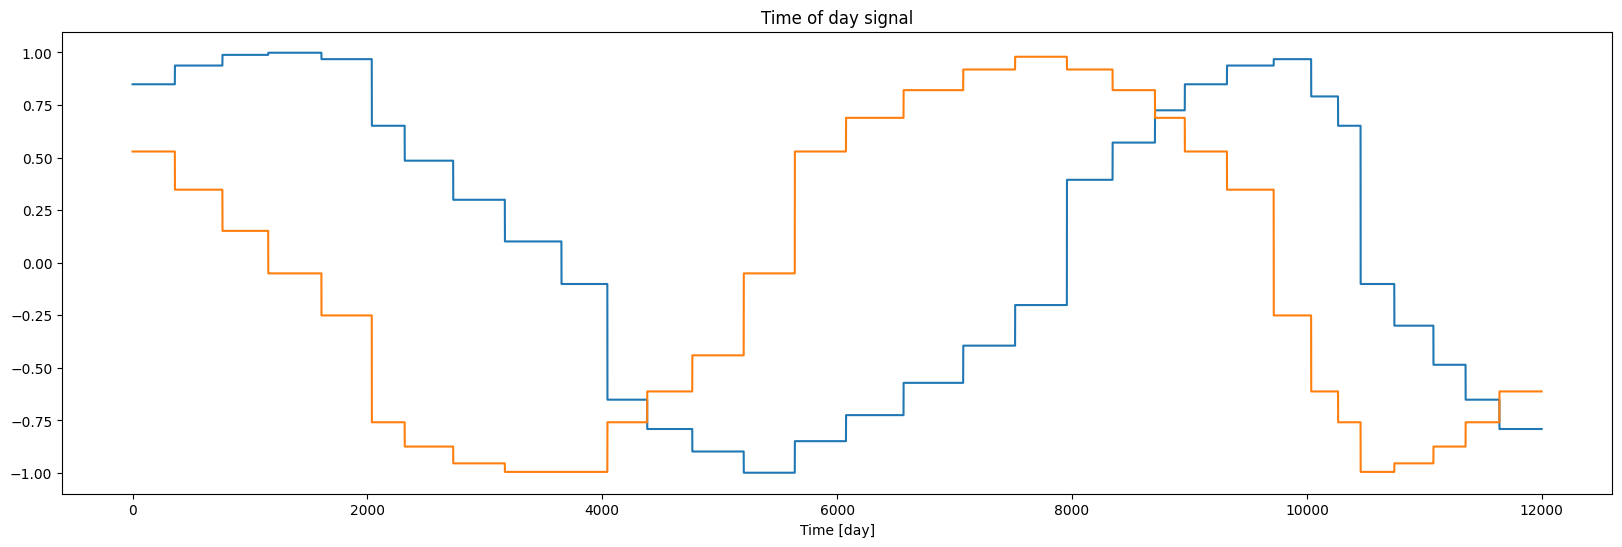

In [178]:
plt.figure(figsize=(20, 6))
plt.plot(train['day_sin'][0:12000])#.unique())
plt.plot(train['day_cos'][0:12000]) #.unique())
plt.xlabel('Time [day]')
plt.title('Time of day signal')
plt.show()

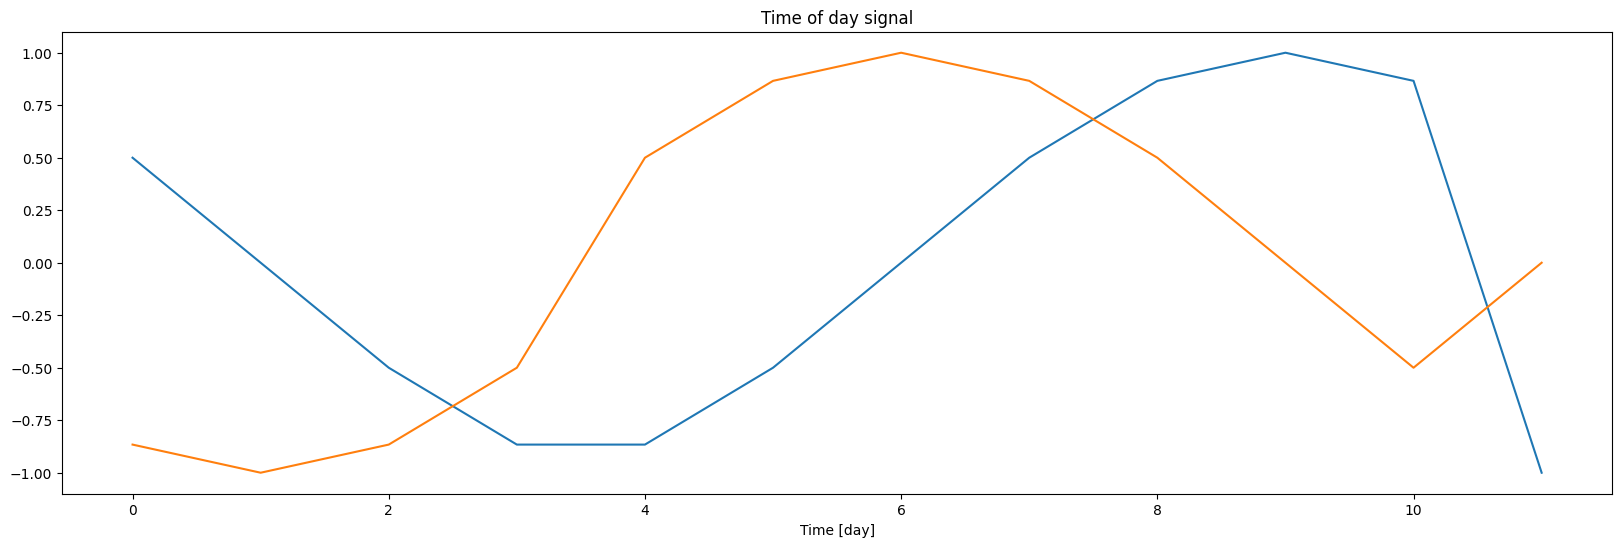

In [179]:
plt.figure(figsize=(20, 6))
plt.plot(train['month_sin'].unique())
plt.plot(train['month_cos'].unique())
plt.xlabel('Time [day]')
plt.title('Time of day signal')
plt.show()

Efectuamos nuevamente la etapa EDA para generar más observaciones acerca de las características ya transformadas.

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns


def plot_corr(data: pd.DataFrame, title: str, method: str = "pearson", annot: bool = True):
    f,ax = plt.subplots(figsize=(10,8))
    sns.heatmap(
        data.corr(method=method),
        vmin=-1,
        vmax=1,
        annot=annot,
        linewidths=.5,
        fmt='.2f',
        ax=ax
    )
    plt.title(f"{method.title()}'s Correlation Coefficient between {title}")
    return ax

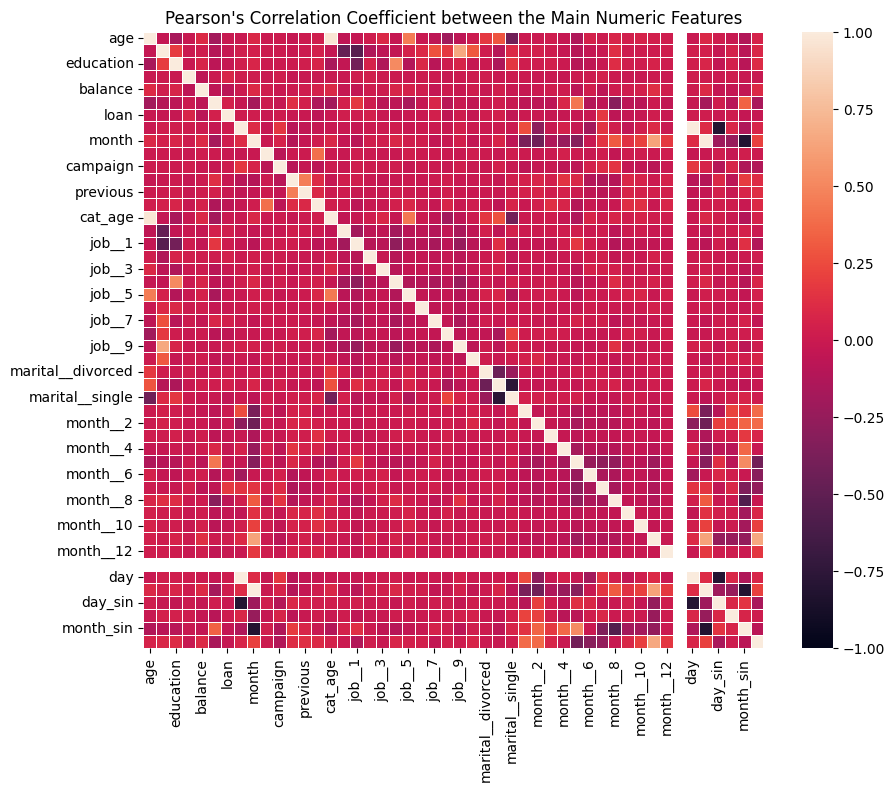

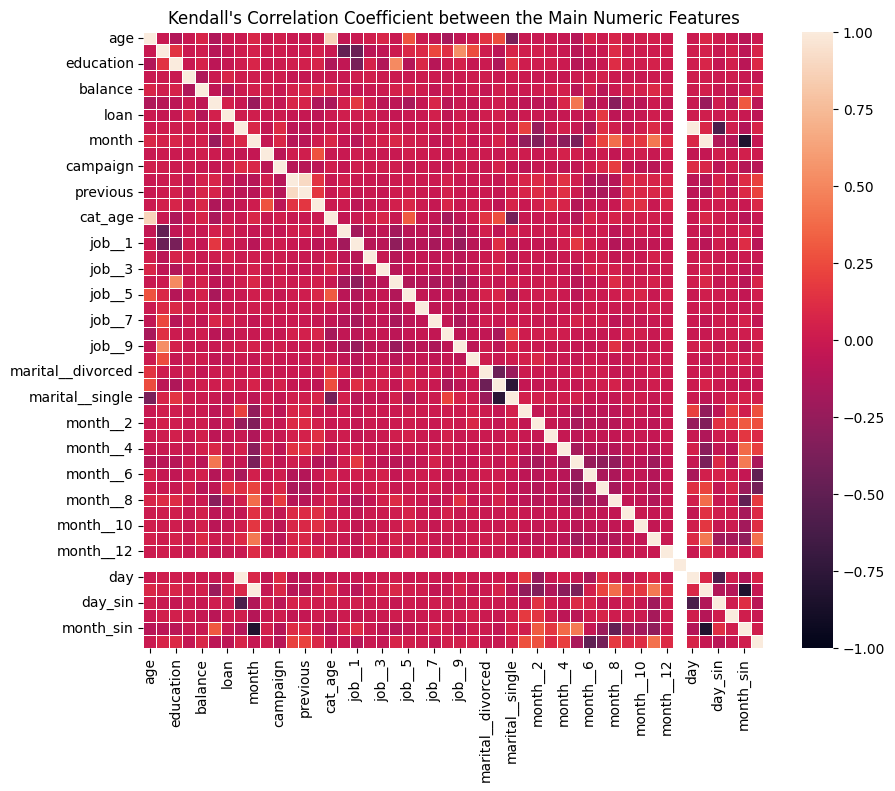

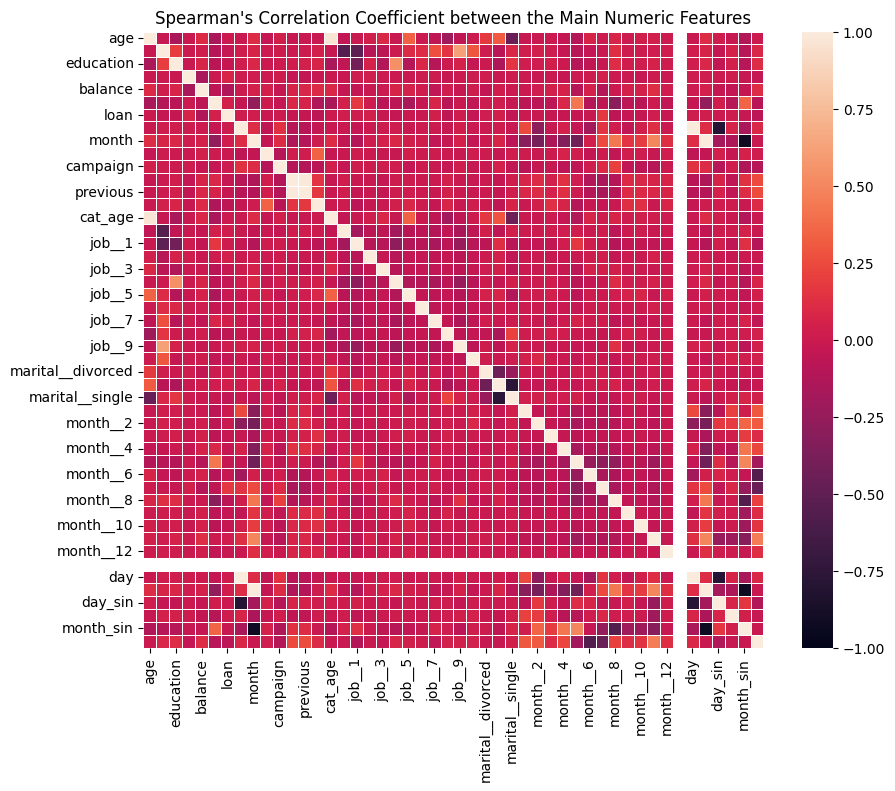

In [147]:
for method in ["pearson", "kendall", "spearman"]:
    ax = plot_corr(
        train.select_dtypes("number"),
        title="the Main Numeric Features",
        method=method,
        annot=False
    )
    plt.show()

In [148]:
with pd.option_context('display.max_columns', None):
    display(train.select_dtypes("number"))

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,cd,cat_age,job__0,job__1,job__2,job__3,job__4,job__5,job__6,job__7,job__8,job__9,job__10,marital__divorced,marital__married,marital__single,month__1,month__2,month__3,month__4,month__5,month__6,month__7,month__8,month__9,month__10,month__11,month__12,year,day,month,day_sin,day_cos,month_sin,month_cos
0,58,4,2,0,2143,1,0,5,5,261,1,0,0,0,5,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,2022,5,5,0.848644,0.528964,0.5,-0.866025
1,44,9,1,0,29,1,0,5,5,151,1,0,0,0,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2022,5,5,0.848644,0.528964,0.5,-0.866025
2,33,2,1,0,2,1,1,5,5,76,1,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,2022,5,5,0.848644,0.528964,0.5,-0.866025
3,47,1,1,0,1506,1,0,5,5,92,1,0,0,0,4,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,2022,5,5,0.848644,0.528964,0.5,-0.866025
4,33,1,1,0,1,0,0,5,5,198,1,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2022,5,5,0.848644,0.528964,0.5,-0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,2,0,825,0,0,17,11,977,3,0,0,1,4,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,2022,17,11,-0.299363,-0.954139,-0.5,0.866025
45207,71,5,0,0,1729,0,0,17,11,456,2,0,0,1,6,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2022,17,11,-0.299363,-0.954139,-0.5,0.866025
45208,72,5,1,0,5715,0,0,17,11,1127,5,184,3,1,6,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,2022,17,11,-0.299363,-0.954139,-0.5,0.866025
45209,57,1,1,0,668,0,0,17,11,508,4,0,0,0,5,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,2022,17,11,-0.299363,-0.954139,-0.5,0.866025


## Selección de caracteristicas

In [202]:
with pd.option_context('display.max_columns', None):
    display(train)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,cd,cat_age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,year,date
0,58,management,married,2,0,2143,1,0,5,5,261,1,0,0,0,5,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,2022,2022-05-05
1,44,technician,single,1,0,29,1,0,5,5,151,1,0,0,0,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,2022,2022-05-05
2,33,entrepreneur,married,1,0,2,1,1,5,5,76,1,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,2022,2022-05-05
3,47,blue-collar,married,1,0,1506,1,0,5,5,92,1,0,0,0,4,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,2022,2022-05-05
4,33,blue-collar,single,1,0,1,0,0,5,5,198,1,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,2022,2022-05-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,2,0,825,0,0,17,11,977,3,0,0,1,4,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,2022,2022-11-17
45207,71,retired,divorced,0,0,1729,0,0,17,11,456,2,0,0,1,6,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2022,2022-11-17
45208,72,retired,married,1,0,5715,0,0,17,11,1127,5,184,3,1,6,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,2022,2022-11-17
45209,57,blue-collar,married,1,0,668,0,0,17,11,508,4,0,0,0,5,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,2022,2022-11-17


In [203]:
baseline_features = [
       'age', 'education', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign',
       'pdays', 'previous', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep'
]
features = [
       'education', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign',
       'pdays', 'previous', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'day_sin', 'day_cos', 'month_sin', 'month_cos', 'cat_age'
]

target = 'cd'

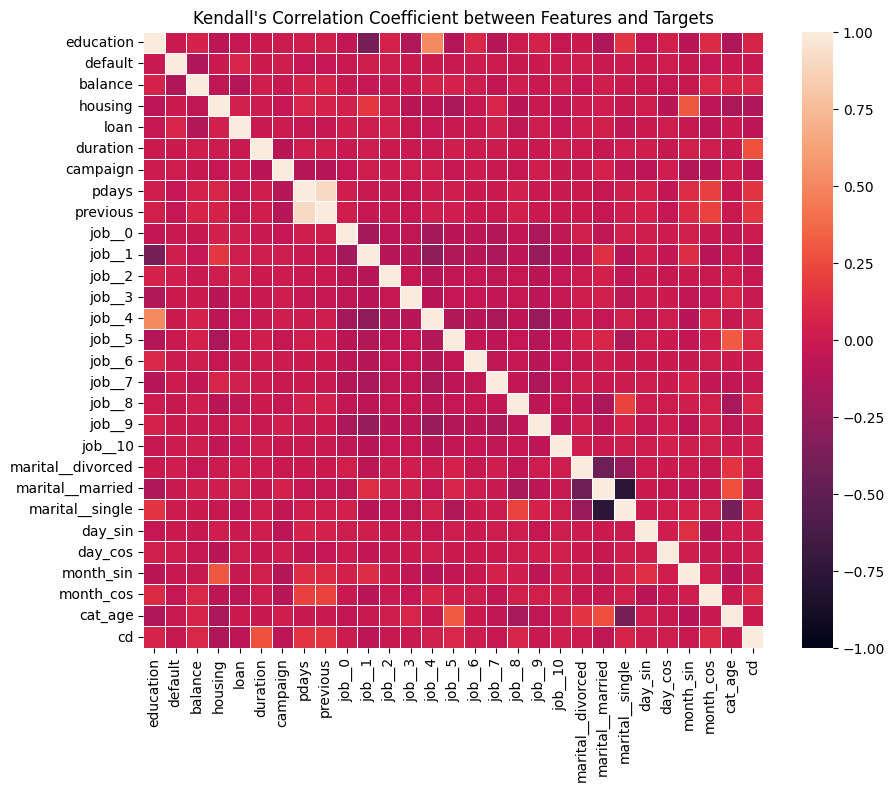

In [150]:
ax = plot_corr(
    train[features + [target]],
    title="Features and Targets",
    method="kendall",
    annot=False
)
plt.show()

<a id="entrenamiento-de-modelos"></a>
## 5. Entrenamiento de modelos

In [210]:
with pd.option_context('display.max_columns', None):
    print(f"[INFO] Training dataset dimnesions (rows, cols): {train[baseline_features].shape}")
    display(train[baseline_features].head())
    print(f"\n[INFO] Testing dataset dimnesions (rows, cols): {test[baseline_features].shape}")
    display(test[baseline_features].head())

[INFO] Training dataset dimnesions (rows, cols): (45211, 36)


,age,education,default,balance,housing,loan,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,2,0,2143,1,0,261,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,44,1,0,29,1,0,151,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,33,1,0,2,1,1,76,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,47,1,0,1506,1,0,92,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,33,1,0,1,0,0,198,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0



[INFO] Testing dataset dimnesions (rows, cols): (4521, 36)


,age,education,default,balance,housing,loan,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,30,0,0,1787,0,0,79,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,33,1,0,4789,1,1,220,1,339,4,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,35,2,0,1350,1,0,185,1,330,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
3,30,2,0,1476,1,1,199,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,59,1,0,0,1,0,226,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [211]:
X_train, X_test = train[baseline_features].values, test[baseline_features].values,
y_train, y_test = train[target].values, test[target].values

In [213]:
from sklearn.linear_model import SGDClassifier

SEED = 42


sgd_clf = SGDClassifier(random_state=SEED)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [224]:
from sklearn.model_selection import cross_val_score

print(
    "[INFO] Accuracy in training: ",
    np.mean(cross_val_score(sgd_clf, X_train, y_train, cv=5, scoring="accuracy"))
)
print(
    "[INFO] Accuracy in testing: ",
    np.mean(cross_val_score(sgd_clf, X_test, y_test, cv=5, scoring="accuracy"))
)

[INFO] Accuracy in training:  0.7735257948072474
[INFO] Accuracy in testing:  0.705344448247201


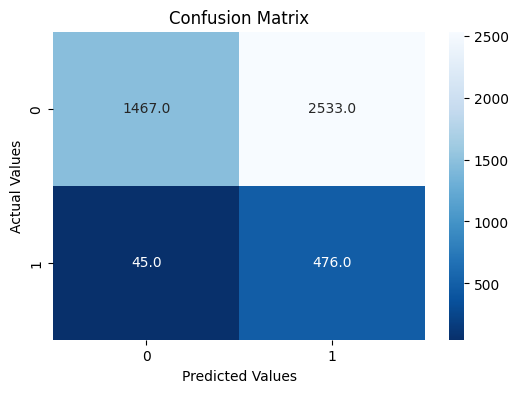

In [236]:
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(cm: np.array, title: str = None):
    plt.figure(figsize=(6, 4))
    cm_plot = sns.heatmap(cm, annot=True, cmap = 'Blues_r', fmt='.1f')
    cm_plot.set_xlabel('Predicted Values')
    cm_plot.set_ylabel('Actual Values')
    cm_plot.set_title("Confusion Matrix" if title is None else f"{title}")
    plt.show()


y_pred = sgd_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

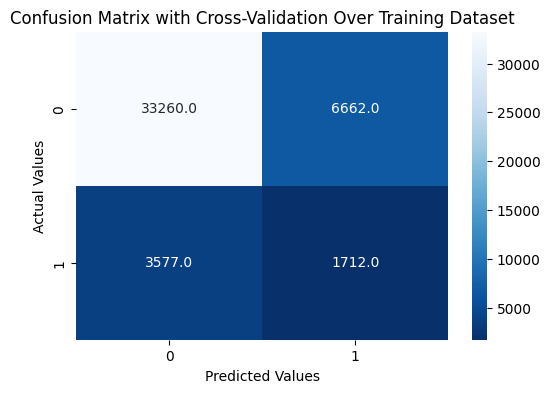

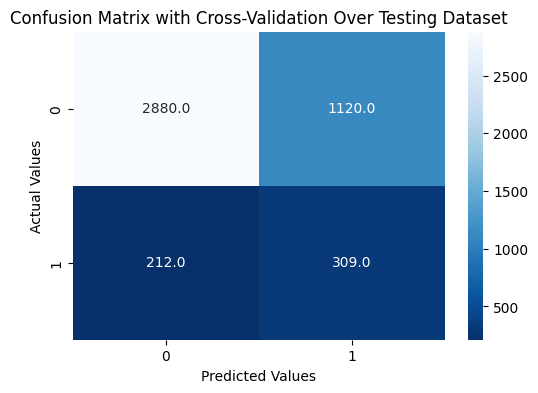

In [239]:
from sklearn.model_selection import cross_val_predict


y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=5)
cm = confusion_matrix(y_train, y_train_pred)
plot_confusion_matrix(cm, "Confusion Matrix with Cross-Validation Over Training Dataset")

y_pred = cross_val_predict(sgd_clf, X_test, y_test, cv=5)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, "Confusion Matrix with Cross-Validation Over Testing Dataset")

<a id='referencias'></a>
## Referencias

[1] Halswanter, T. (2016). *An Introduction to Statistics with Python: With Applications in the Life Sciences.* Springer.

[2] Géron, A. (2022). *Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow.* " O'Reilly Media, Inc.".

[3] VanderPlas, J. (2016). *Python data science handbook: Essential tools for working with data.* " O'Reilly Media, Inc.".

[4] Aggarwal, C. C. (2015). *Data mining: the textbook (Vol. 1)*. New York: springer.

<a id='contribuir'></a>
## Contribuir

<p>Para correcciones, <i>bugs</i> o sugerencias, por favor escribe a <a href="mailto:joseph@guane.com.co">info@joefaver.dev</a> o directamente en el repositorio.</p>